# **Testing of the sampling algorithms**

In this jupyter notebook we will be testing and showcasing our library SamplingLIB. It includes sampling algorithms along with some helper functions for visualization and benchmarking.

Sampling algorithms:
1. Random Walk Metropolis Hastings (MH)
2. Adaptive Metropolis (AM)
3. Delayed Rejection Adaptive Metropolis (DRAM)
4. DiffeRential Evolution Adaptive Metropolis (DREAM)

**We load classes from SamplingLIB and other requiered libraries**

In [1]:
from SamplingLIB import Sampling, MH, AM, DRAM, DREAM, benchmark, benchmark_average
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
import pandas as pd

## **Testing data**

We create a few distribution function to demonstrate our methods on.

### **Donut distribution (dim=2)**

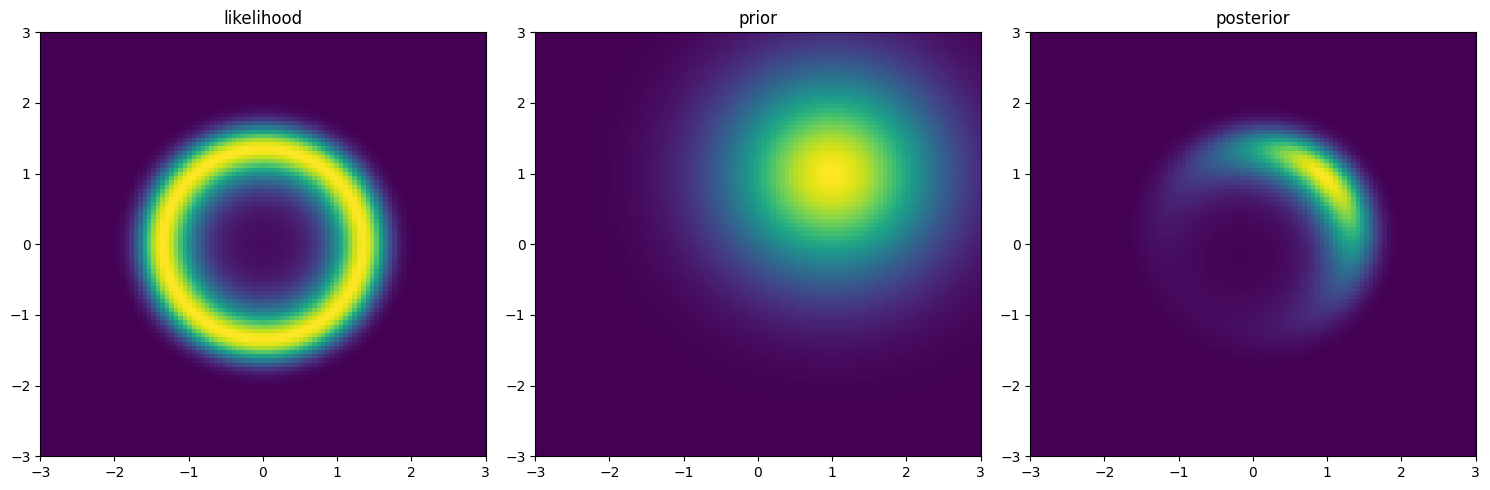

In [ ]:
# Parameters
donut_dim = 2
log = True

# Likelihood
#donut_y = 2.0  # observation
donut_noise = 0.5  # noise standard deviation
def donut_forward(u):
    return (u[0]**2+u[1]**2)
donut_y = 2.0

# Prior
prior_means = [[1.0, 1.0]]
prior_covs = [[1.0, 1.0]]

donut = Sampling(dimension=donut_dim, 
                 forward_model=donut_forward, 
                 observed_data=donut_y, 
                 noise_cov=donut_noise, 
                 prior_means=prior_means, 
                 prior_covs=prior_covs, 
                 log=log)

donut.visualize(max_points=100, ranges=[(-3, 3), (-3, 3)], visuals=["likelihood", "prior", "posterior"])

### **Rosenbrock (Banana) distribution (dim=2)**

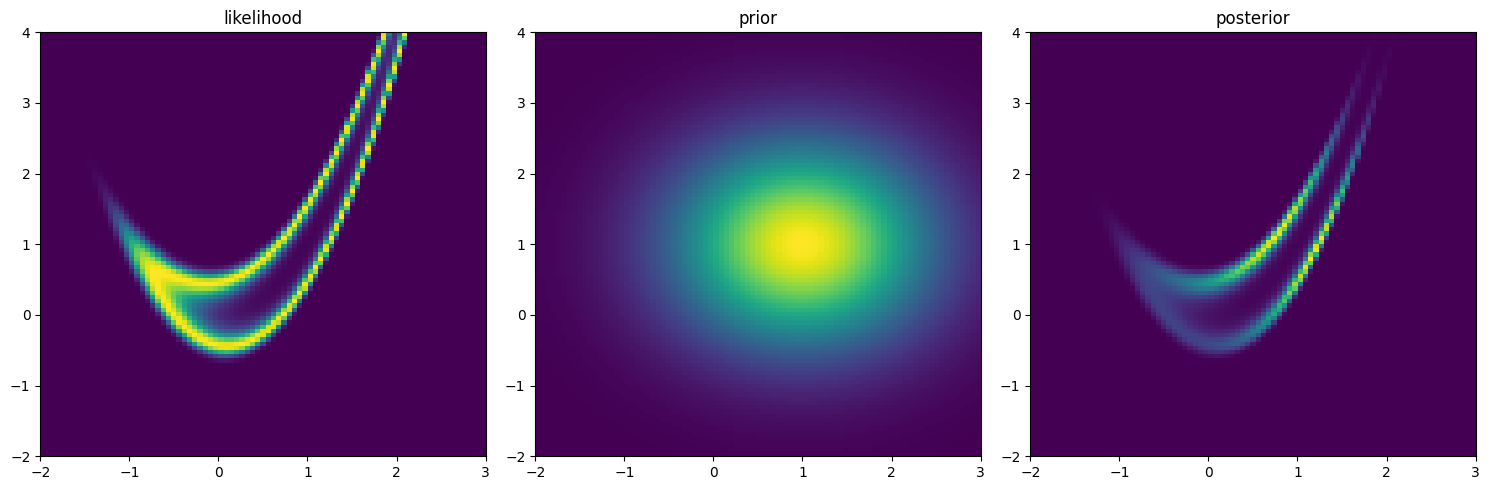

In [ ]:
# Parameters
banana_dim = 2
log = True
banana_ranges = [(-2, 3), (-2, 4)]

# Likelihood
banana_y = 3.0  # observation
banana_noise = 1.0  # noise standard
def banana_forward(u):
    a = 1.0
    b = 10.0
    return (a-u[0])**2 + b*(u[1]-(u[0])**2)**2

# Prior
prior_means = [[1.0, 1.0]]
prior_covs = [[1.0, 1.0]]

banana = Sampling(dimension=banana_dim, 
                  forward_model=banana_forward, 
                  observed_data=banana_y, 
                  noise_cov=banana_noise, 
                  prior_means=prior_means, 
                  prior_covs=prior_covs, 
                  log=log)

banana.visualize(max_points=100, ranges=[(-2, 3), (-2, 4)], visuals=["likelihood", "prior", "posterior"])

### **Elipse distribution (dim=2)**

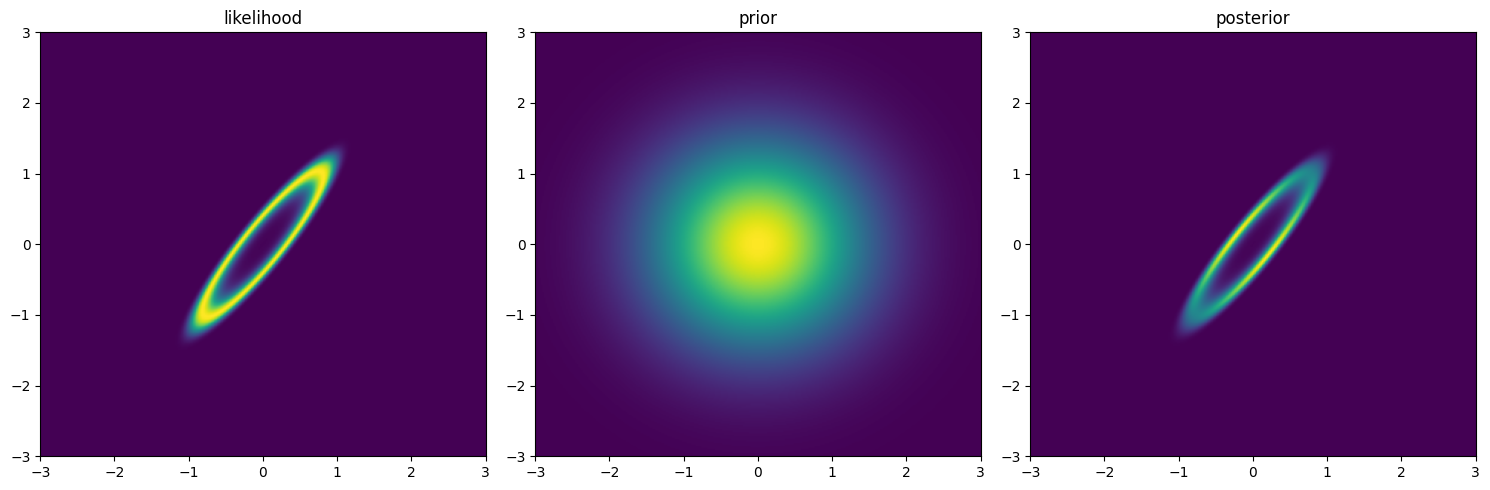

In [ ]:
# Parameters
elipse_dim = 2
log = True

# Likelihood
elipse_y = 3.0  # observation
elipse_noise = 1.0  # noise standard deviation
def elipse_forward(u):
    return ((5*u[0]-3*u[1])**2+(+3*u[1]-2*u[0])**2)

# Prior
prior_means = [[0.0, 0.0]]
prior_covs = [[1.0, 1.0]]

elipse = Sampling(dimension=elipse_dim, 
                  forward_model=elipse_forward, 
                  observed_data=elipse_y, 
                  noise_cov=elipse_noise, 
                  prior_means=prior_means, 
                  prior_covs=prior_covs, 
                  log=log)

elipse.visualize(max_points=100, ranges=[(-3, 3), (-3, 3)], visuals=["likelihood", "prior", "posterior"])

### **Rainbow distribution (dim=2)**

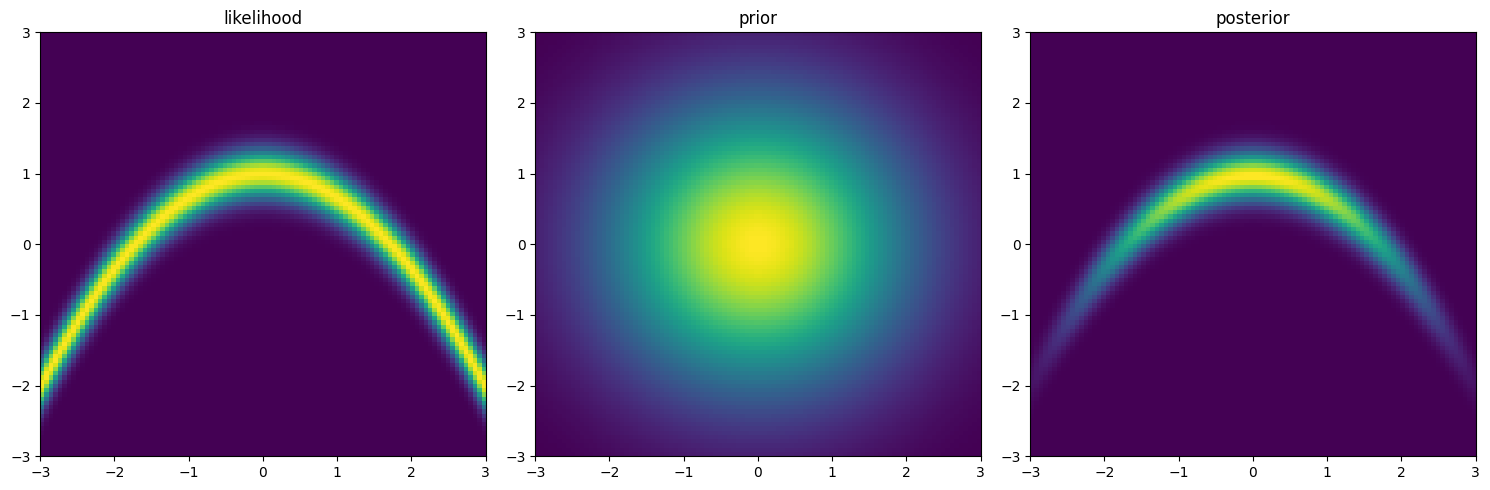

In [11]:
# Parameters
rainbow_dim = 2
log = True

# Prior
prior_means = [np.zeros(2)]
prior_covs = [2*np.eye(2)]

# Likelihood
def rainbow_forward(u):
    return np.array([u[0]**2 + 3*u[1]])
noise_cov = 0.5
y_obs = 3.0

# Set up Sampling class for rainbow
rainbow = Sampling(
    dimension=rainbow_dim,
    forward_model=rainbow_forward,
    observed_data=y_obs,
    noise_cov=noise_cov,
    prior_means=prior_means,
    prior_covs=prior_covs,
    log=log
)
rainbow.visualize(max_points=100, ranges=[(-3, 3), (-3, 3)], visuals=["likelihood", "prior", "posterior"])

### **Comet distribution (dim=2)**

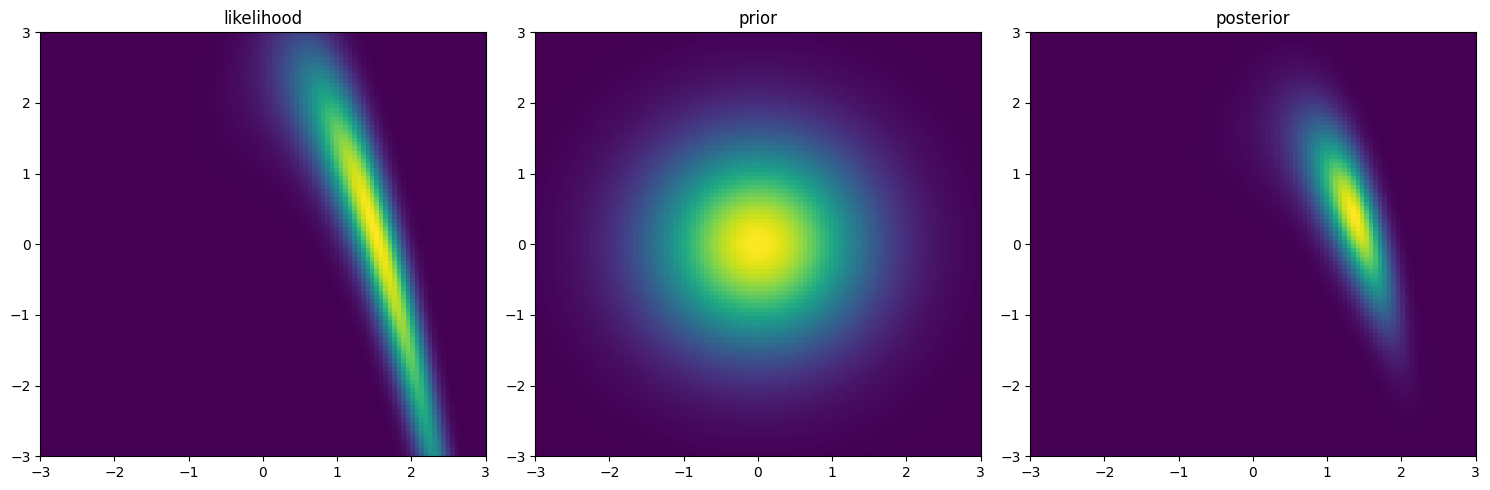

In [ ]:
# Parameters
comet_dim = 2
log = True

# Prior
prior_means = [np.zeros(2)]
prior_covs = [np.eye(2)]

# Likelihood
def comet_forward(u):
    return np.array([u[0], u[1] + 1.0 * (u[0]**2 - 100)])
noise_cov = np.diag([0.5, 0.5])
y_obs = np.array([1.5, -97.5])

# Set up Sampling class for comet
comet = Sampling(
    dimension=comet_dim,
    forward_model=comet_forward,
    observed_data=y_obs,
    noise_cov=noise_cov,
    prior_means=prior_means,
    prior_covs=prior_covs,
    log=log
)
comet.visualize(max_points=100, ranges=[(-3, 3), (-3, 3)], visuals=["likelihood", "prior", "posterior"])

### **Multimodal distribution (dim=2)**

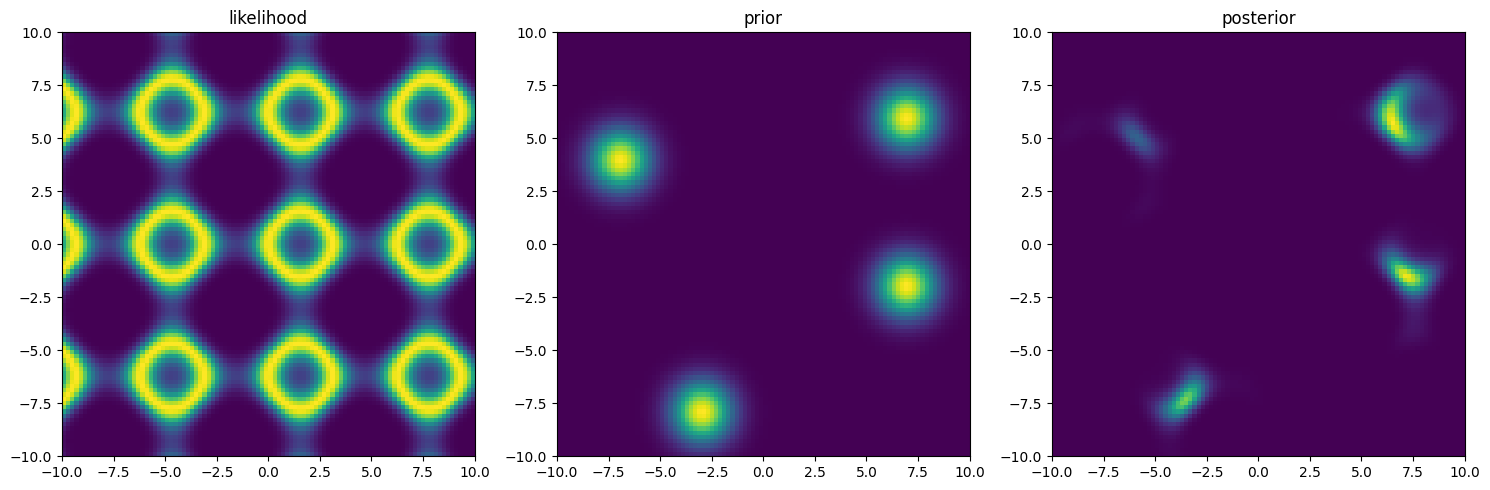

In [2]:
# Parameters
multimodal_dim = 2
log = True

# Likelihood
def multimodal_forward(u):
    return np.array([np.sin(u[0]) + np.cos(u[1])])
noise_cov = 0.3
y_obs = 1.0

# Prior
prior_means = [np.array([7, 6]), np.array([-7, 4]), np.array([7, -2]), np.array([-3, -8])]  # Two means
prior_covs = [np.eye(2), np.eye(2), np.eye(2), np.eye(2)]                   # Two covariance matrices

# Set up Sampling class for multimodal
multimodal = Sampling(
    dimension=multimodal_dim,
    forward_model=multimodal_forward,
    observed_data=y_obs,
    noise_cov=noise_cov,
    prior_means=prior_means,
    prior_covs=prior_covs,
    log=log
)
multimodal.visualize(max_points=100, ranges=[(-10, 10), (-10, 10)], visuals=["likelihood", "prior", "posterior"])

### **Multidim distribution (dim=39)**

In [3]:
# Parameters
test_dim = 39
log = True

# Likelihood
# test_y = 1000.0
# test_noise = 10  # noise standard deviation
# def sphere_forward(x):
#     return np.sum(x**2)
def non_informative_likelihood(x):
    return 0.0

# Prior
prior_means = [np.random.uniform(-5, 5, test_dim)]
prior_covs = [np.random.uniform(1, 5, test_dim)]  # Ensures absolute value is never smaller than 1.

#test = Sampling(dimension=test_dim, forward_model=sphere_forward, observed_data=test_y, noise_cov=test_noise, prior_means=prior_means, prior_covs=prior_covs, log=log)
test = Sampling(dimension=test_dim, likelihood=non_informative_likelihood, prior_means=prior_means, prior_covs=prior_covs, log=log)


## **Basic Metropolis-Hastings**

In this section we will test and visualize the results of MH algorithm.

### **Donut distribution (dim=2)**

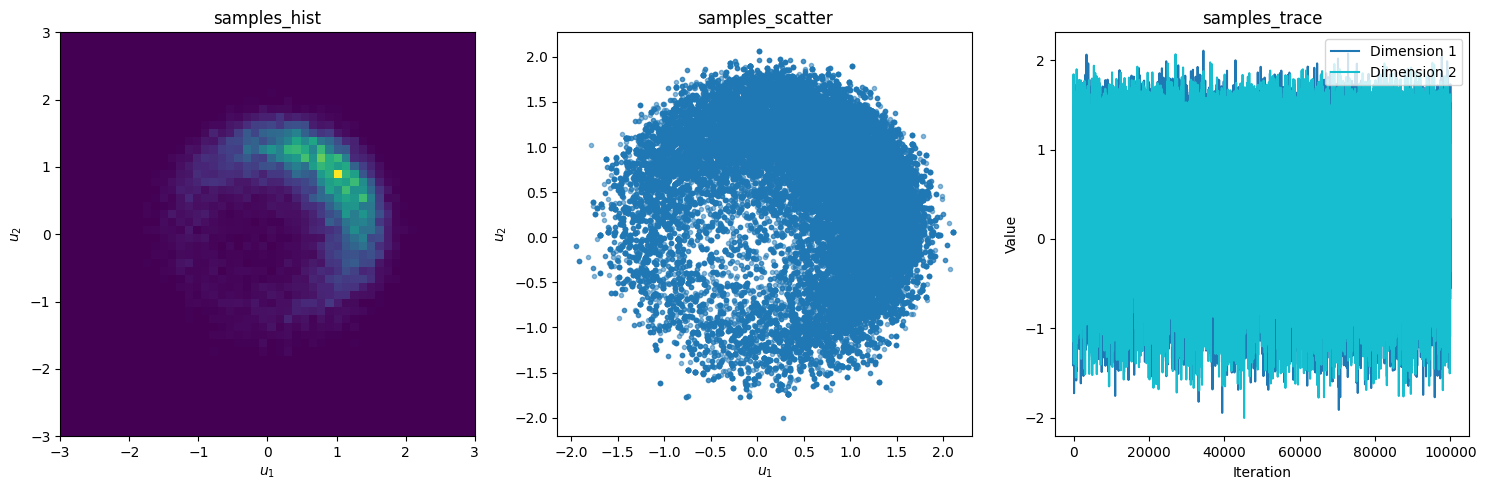

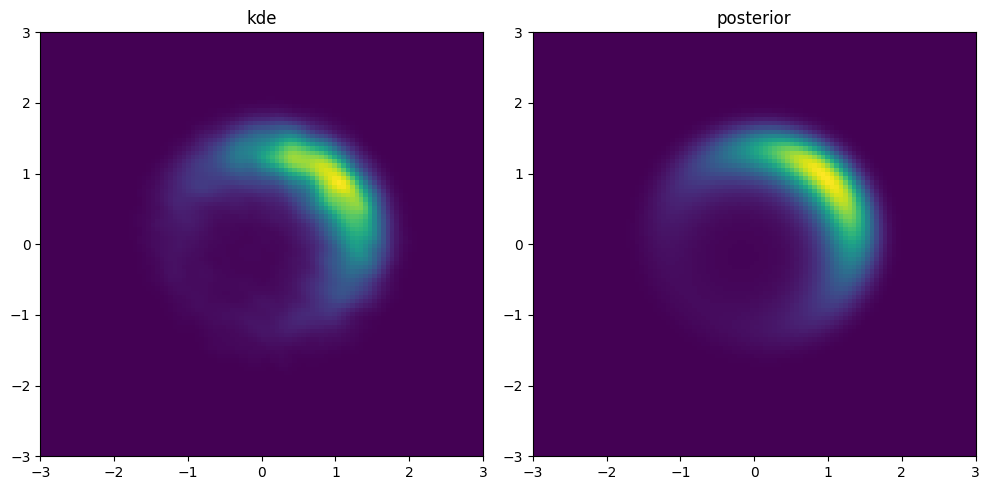

KL: 0.010643119117048927
Acceptance rate: 15.14%


In [12]:
initial_cov = None
scale_factor = None
burnin = 0.2

donut_MH = MH(distribution=donut, initial_cov=initial_cov, scale_factor=scale_factor, burnin=burnin)

initial = None
N = 100000

donut_MH.sample(initial=initial, N=N)
ranges = [(-3, 3), (-3, 3)]
donut_MH.visualize(["samples_hist", "samples_scatter", "samples_trace"], ranges=ranges)
print("KL:", donut_MH.sampling_quality(donut_MH.samples, visualise=True, ranges=ranges))
print(f"Acceptance rate: {(donut_MH.acc_rate * 100):.2f}%")

In [14]:
smpls = donut_MH.samples
print("Samples shape:", smpls.shape)
print("Mean of samples:", np.mean(smpls, axis=0))
normalized_euclidean_distance(smpls, np.array([1.0, 1.0]))
#print("True mean:", donut_DREAM.true_mean)

Samples shape: (100000, 2)
Mean of samples: [0.62598038 0.6158842 ]
Estimated mean: [0.62598038 0.6158842 ], True mean: [1. 1.]


np.float64(0.3791013214847203)

### **Banana distribution (dim=2)**

In [ ]:
initial_cov = None
scale_factor = None
burnin = 0.2

banana_MH = MH(distribution=banana, initial_cov=initial_cov, scale_factor=scale_factor, burnin=burnin)

initial = None
N = 100000

banana_MH.sample(initial=initial, N=N)
ranges = [(-2, 3), (-2, 4)]
banana_MH.visualize(visuals=["samples_hist", "samples_scatter", "samples_trace"], ranges=ranges)
print("KL:", banana_MH.sampling_quality(banana_MH.samples, visualise=True))
print(f"Acceptance rate: {(banana_MH.acc_rate * 100):.2f}%")

### **Comet distribution (dim=2)**

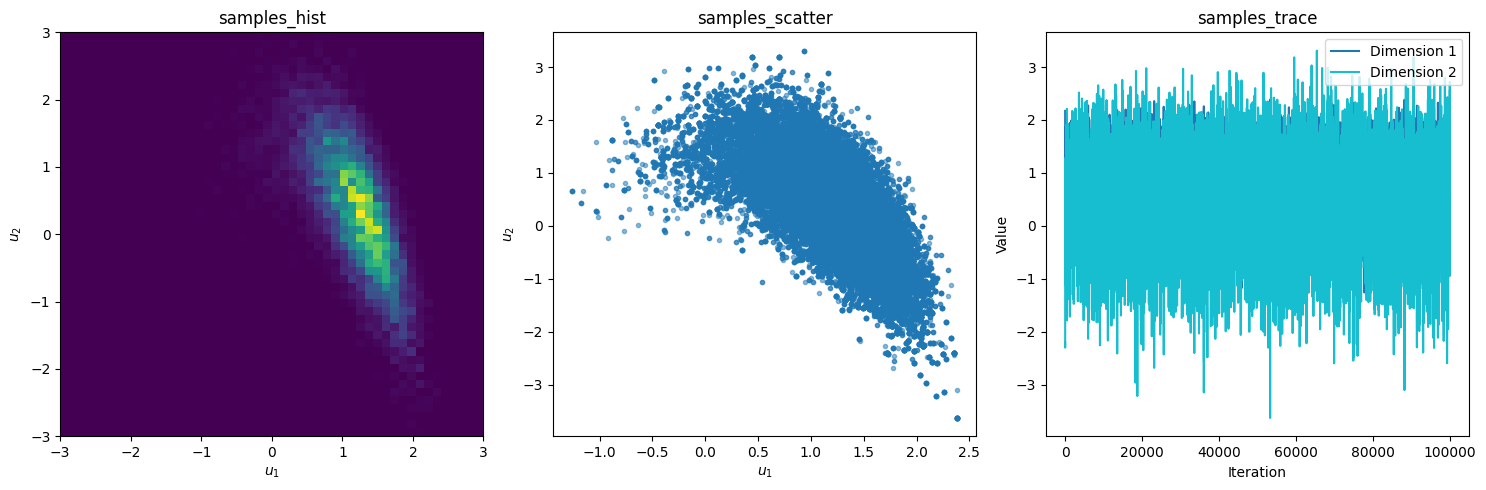

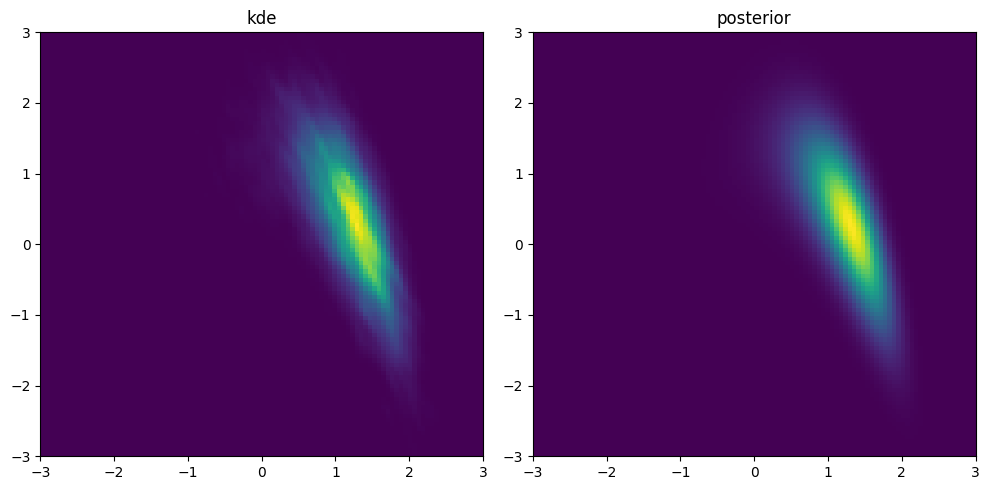

KL: 0.009948482807123932
Acceptance rate: 11.87%


In [ ]:
# Parameters for MH
initial_cov = None
scale_factor = None
burnin = 0.2

# Create MH instance for comet
comet_MH = MH(distribution=comet, 
                   initial_cov=initial_cov, 
                   scale_factor=scale_factor, 
                   burnin=burnin)

# Sampling
initial = None
N = 100000
comet_MH.sample(initial=initial, N=N)
ranges = [(-3, 3), (-3, 3)]

# Visualization of obtained samples
comet_MH.visualize(visuals=["samples_hist", "samples_scatter", "samples_trace"], ranges=ranges)
print("KL:", comet_MH.sampling_quality(comet_MH.samples, visualise=True, ranges=ranges))
print(f"Acceptance rate: {(comet_MH.acc_rate * 100):.2f}%")

## **Adaptive Metropolis**

### **Comet distribution (dim=2)**

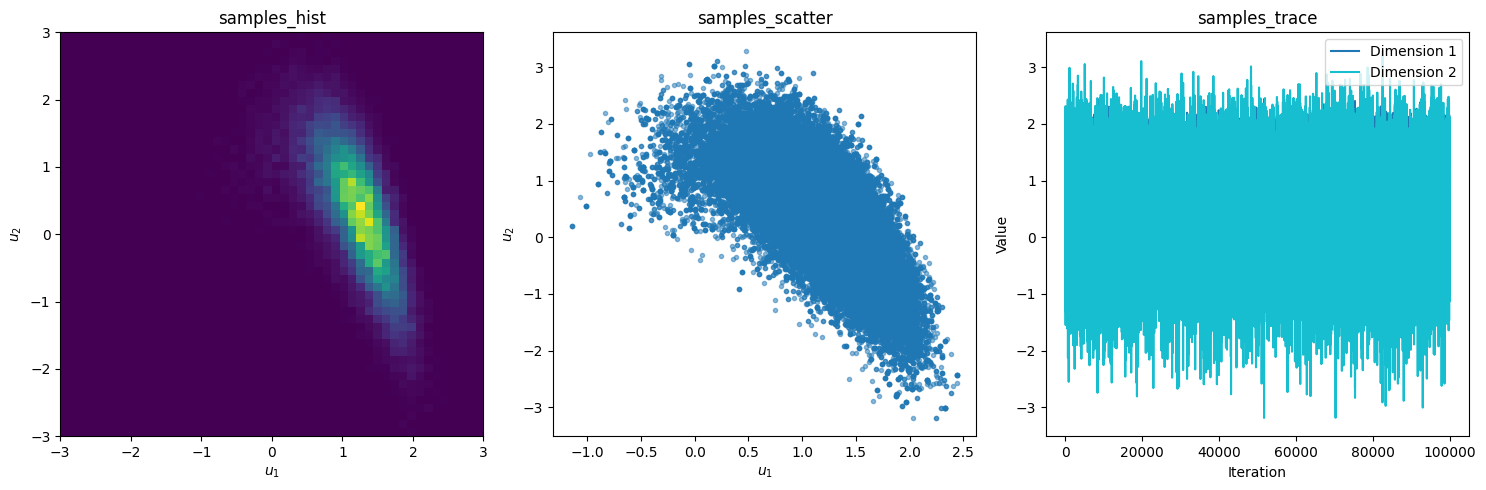

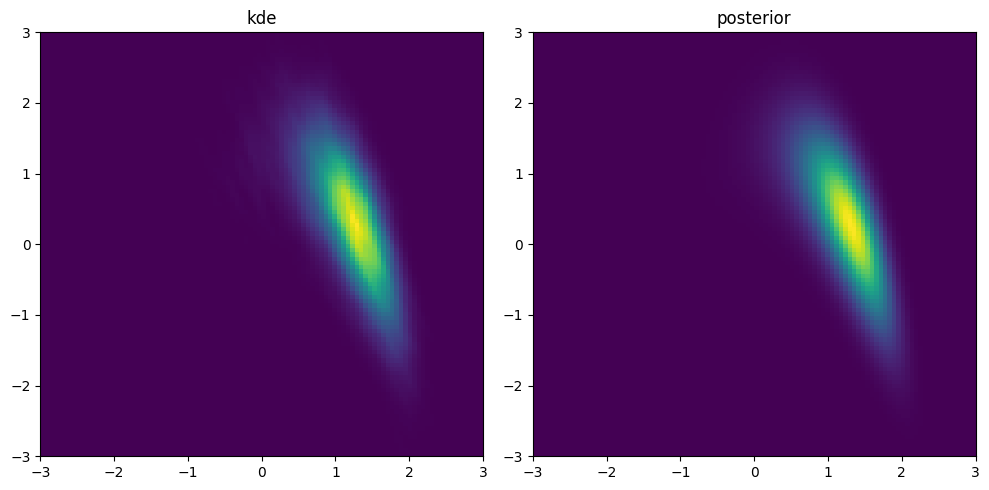

KL: 0.005110783499749108
Acceptance rate: 32.89%


In [ ]:
# Parameters for AM
initial_cov = None
scale_factor = None
initial = None
N = 100000
burnin = 0.2
eps = 1e-5
update_step = 1

# Create AM instance for comet
comet_AM = AM(distribution=comet, 
                   initial_cov=initial_cov, 
                   scale_factor=scale_factor, 
                   burnin=burnin, 
                   eps=eps, 
                   update_step=update_step)

# Sampling
comet_AM.sample(initial=initial, N=N)
ranges = [(-3, 3), (-3, 3)]

# Visualization of obtained samples
comet_AM.visualize(visuals=["samples_hist", "samples_scatter", "samples_trace"], ranges=ranges)
print("KL:", comet_AM.sampling_quality(comet_AM.samples, visualise=True, ranges=ranges))
print(f"Acceptance rate: {(comet_AM.acc_rate * 100):.2f}%")

### **Donut distribution (dim=2)**

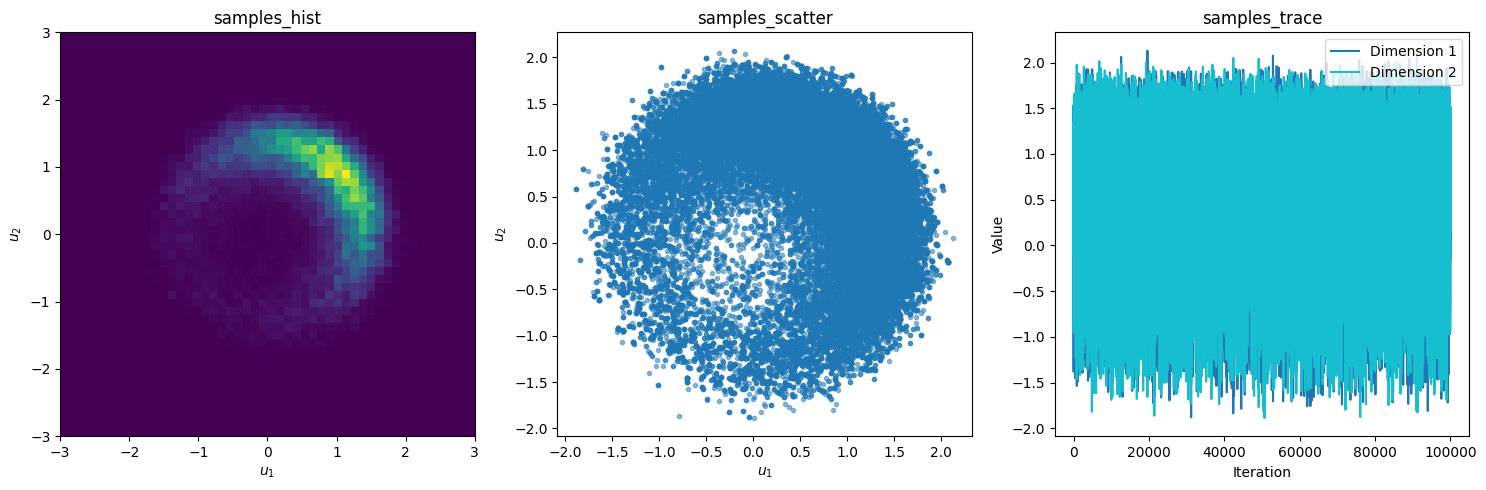

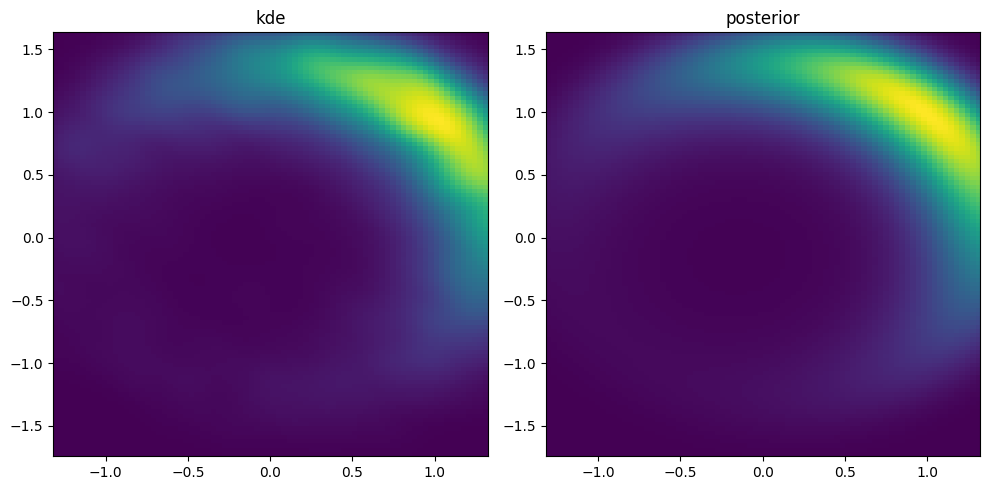

KL: 0.003951576463743745
Acceptance rate: 23.53%


In [66]:
initial_cov = None
scale_factor = None
burnin = 0.2
eps = 1e-5
update_step = 1

donut_AM = AM(distribution=donut, 
               initial_cov=initial_cov, 
               scale_factor=scale_factor, 
               burnin=burnin, 
               eps=eps, 
               update_step=update_step)

initial = None
N = 100000

donut_AM.sample(initial=initial, N=N)
ranges = [(-3, 3), (-3, 3)]
donut_AM.visualize(visuals=["samples_hist", "samples_scatter", "samples_trace"], ranges=ranges)
print("KL:", donut_AM.sampling_quality(donut_AM.samples, visualise=True))
print(f"Acceptance rate: {(donut_AM.acc_rate * 100):.2f}%")

### **Banana distribution (dim=2)**

In [ ]:
initial_cov = None
scale_factor = None
burnin = 0.2
eps = 1e-5
update_step = 1

banana_AM = AM(distribution=banana, 
               initial_cov=initial_cov, 
               scale_factor=scale_factor, 
               burnin=burnin, eps=eps, 
               update_step=update_step)

initial = None
N = 100000

banana_AM.sample(initial=initial, N=N)
ranges = [(-2, 3), (-2, 4)]
banana_AM.visualize(visuals=["samples_hist", "samples_scatter", "samples_trace"], ranges=ranges)
print("KL:", banana_AM.sampling_quality(banana_AM.samples, visualise=True, ranges=ranges))
print(f"Acceptance rate: {(banana_AM.acc_rate * 100):.2f}%")

### **Elipse distribution (dim=2)**

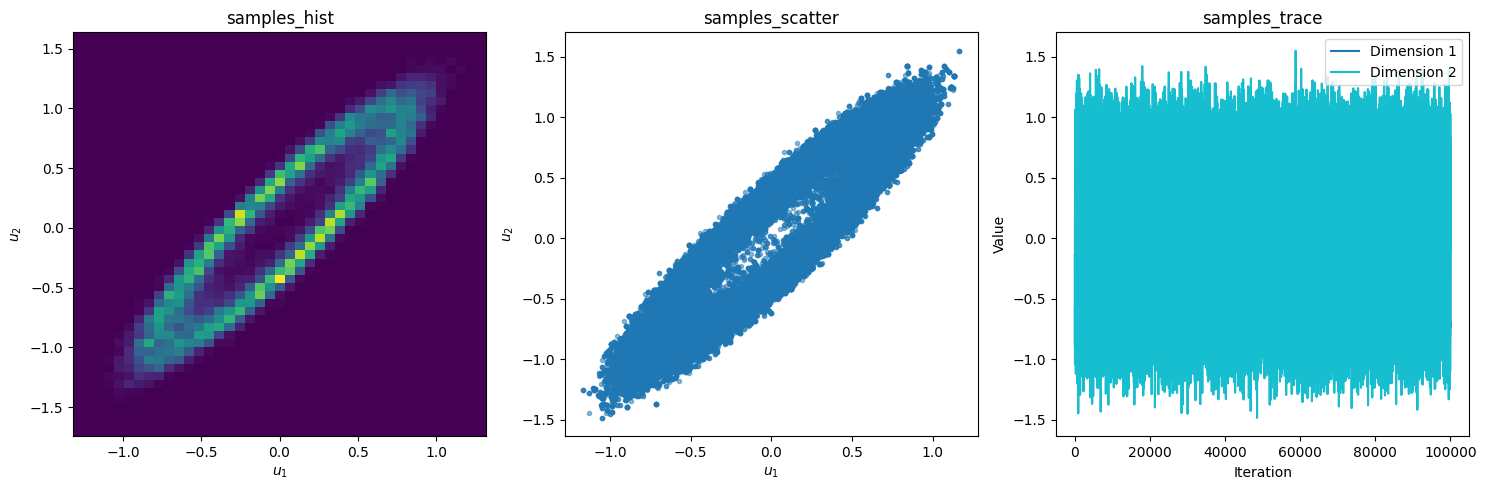

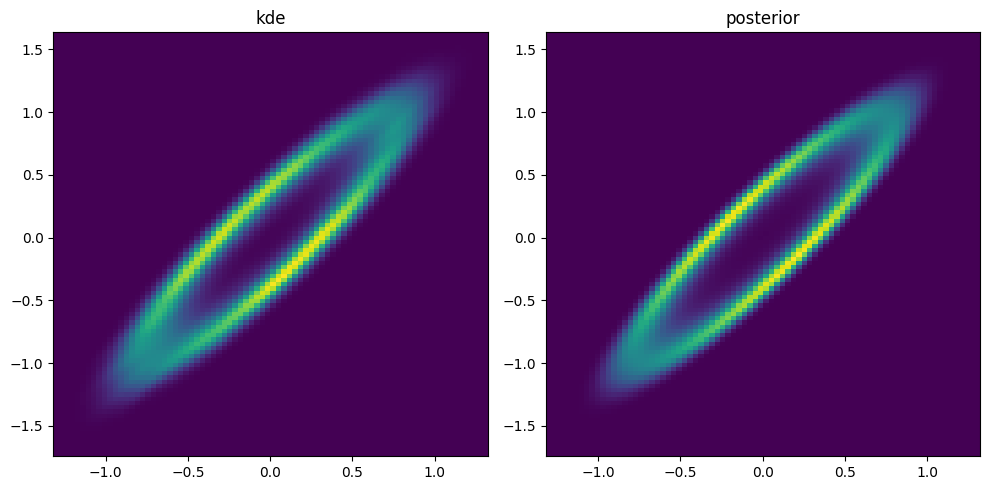

KL: 0.028147329332988417
Acceptance rate: 20.72%


In [35]:
initial_cov = None
scale_factor = None
burnin = 0.2
eps = 1e-5
update_step = 1

elipse_AM = AM(distribution=elipse, 
               initial_cov=initial_cov, 
               scale_factor=scale_factor, 
               burnin=burnin, 
               eps=eps, 
               update_step=update_step)

initial = None
N = 100000

elipse_AM.sample(initial=initial, N=N)
elipse_AM.visualize(visuals=["samples_hist", "samples_scatter", "samples_trace"])
print("KL:", elipse_AM.sampling_quality(elipse_AM.samples, visualise=True))
print(f"Acceptance rate: {(elipse_AM.acc_rate * 100):.2f}%")

## **DRAM**

### **Elipse distribution (dim=2)**

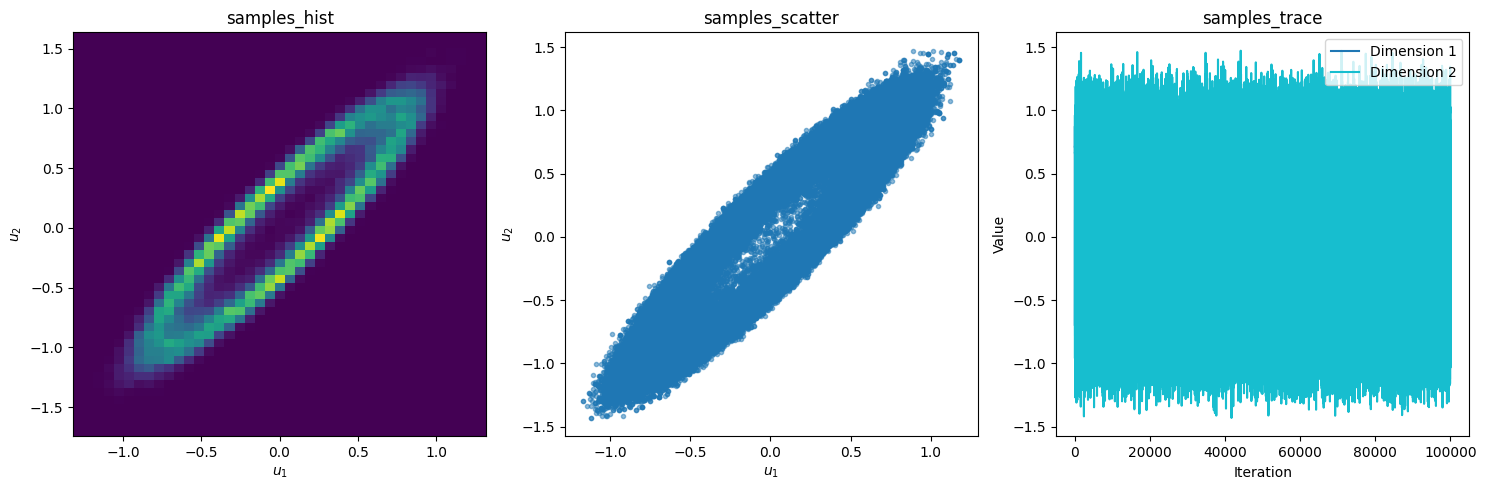

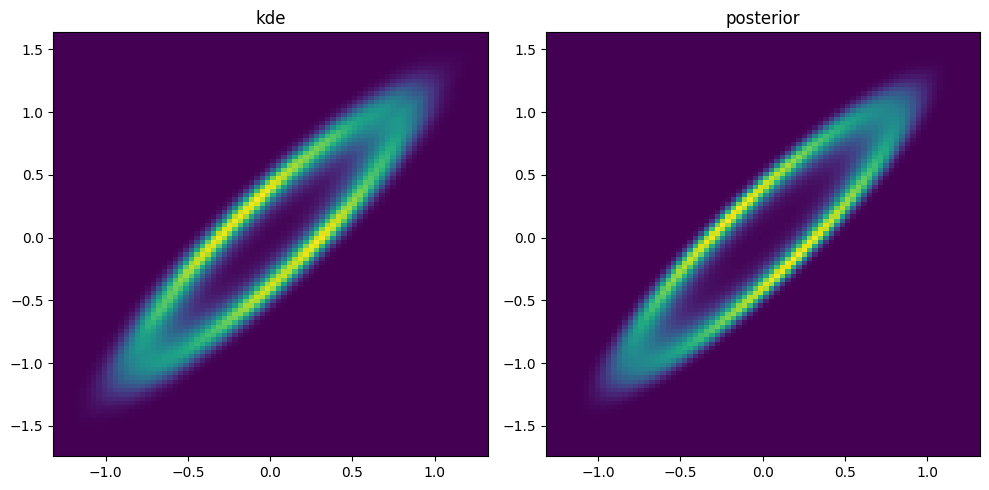

KL: 0.026334383930054727
Acceptance rate for stage 1: 20.73%
Acceptance rate for stage 2: 22.61%
Acceptance rate for stage 3: 19.67%
Acceptance rate: 50.72%


In [36]:
initial_cov = None
scale_factor = None
burnin = 0.2
eps = 1e-5
update_step = 1
gammas = None
num_stages = 3

elipse_DRAM = DRAM(distribution=elipse, 
                   initial_cov=initial_cov, 
                   scale_factor=scale_factor, 
                   burnin=burnin, eps=eps, 
                   update_step=update_step, 
                   gammas=gammas, 
                   num_stages=num_stages)

initial = None
N = 100000
elipse_DRAM.sample(initial=initial, N=N)
elipse_DRAM.visualize(visuals=["samples_hist", "samples_scatter", "samples_trace"])
print("KL:", elipse_DRAM.sampling_quality(elipse_DRAM.samples, visualise=True))
for i, acc_rate in enumerate(elipse_DRAM.acc_rate):
    print(f"Acceptance rate for stage {i+1}: {(acc_rate * 100):.2f}%")
print(f"Acceptance rate: {(sum(elipse_DRAM.acc[:,1])/len(elipse_DRAM.samples)) * 100:.2f}%")

### **Banana distribution (dim=2)**

In [ ]:
initial_cov = None
scale_factor = None
burnin = 0.2
eps = 1e-5
update_step = 1
gammas = None
num_stages = 3

banana_DRAM = DRAM(distribution=banana, 
                   initial_cov=initial_cov, 
                   scale_factor=scale_factor,
                   burnin=burnin, 
                   eps=eps, 
                   update_step=update_step, 
                   gammas=gammas, 
                   num_stages=num_stages)

initial = None
N = 100000

banana_DRAM.sample(initial=initial, N=N)
ranges = [(-2, 3), (-2, 4)]
banana_DRAM.visualize(visuals=["samples_hist", "samples_scatter", "samples_trace"], ranges=ranges)
print("KL:", banana_DRAM.sampling_quality(banana_DRAM.samples, visualise=True, ranges=ranges))
for i, acc_rate in enumerate(banana_DRAM.acc_rate):
    print(f"Acceptance rate for stage {i+1}: {(acc_rate * 100):.2f}%")
print(f"Acceptance rate: {(sum(banana_DRAM.acc[:,1])/len(banana_DRAM.samples)) * 100:.2f}%")

### **Multimodal distribution (dim=2)**

In [6]:
initial_cov = None
scale_factor = None
burnin = 0.2
eps = 1e-5
update_step = 1
gammas = None
num_stages = 3

multimodal_DRAM = DRAM(distribution=multimodal, 
                       initial_cov=initial_cov, 
                       scale_factor=scale_factor, 
                       burnin=burnin, 
                       eps=eps, 
                       update_step=update_step, 
                       gammas=gammas, 
                       num_stages=num_stages)

#### Benchamark

e:\Code\BC\Codes\SamplingLIB.py:1083: RuntimeWarning: divide by zero encountered in log1p
  numerator_alpha += np.log1p(-np.exp(self._acceptance_probability(stage_posterior=stage_posterior[i:][::-1], proposals=proposals[i:][::-1], t=t)))
e:\Code\BC\Codes\SamplingLIB.py:1086: RuntimeWarning: divide by zero encountered in log1p
  denominator_alpha += np.log1p(-np.exp(self._acceptance_probability(stage_posterior=stage_posterior[:len(stage_posterior) - i], proposals=proposals[:len(stage_posterior) - i], t=t)))


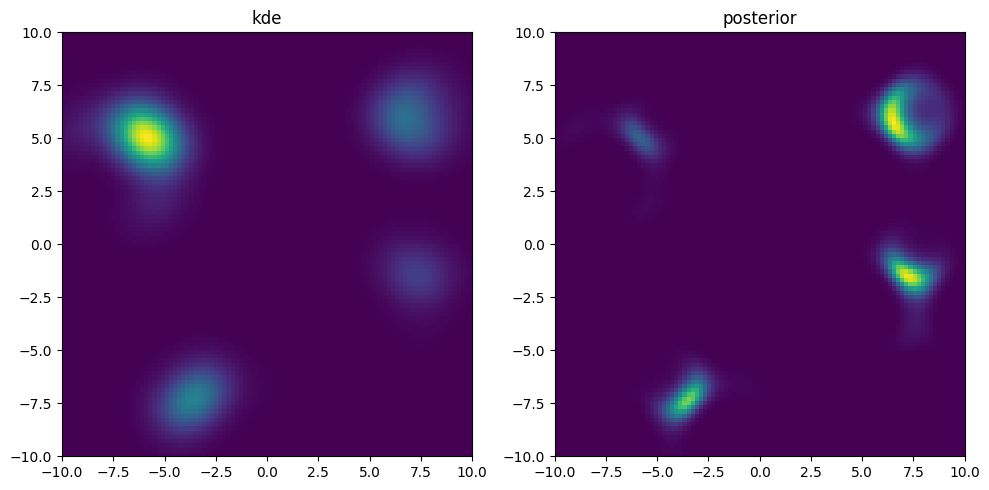

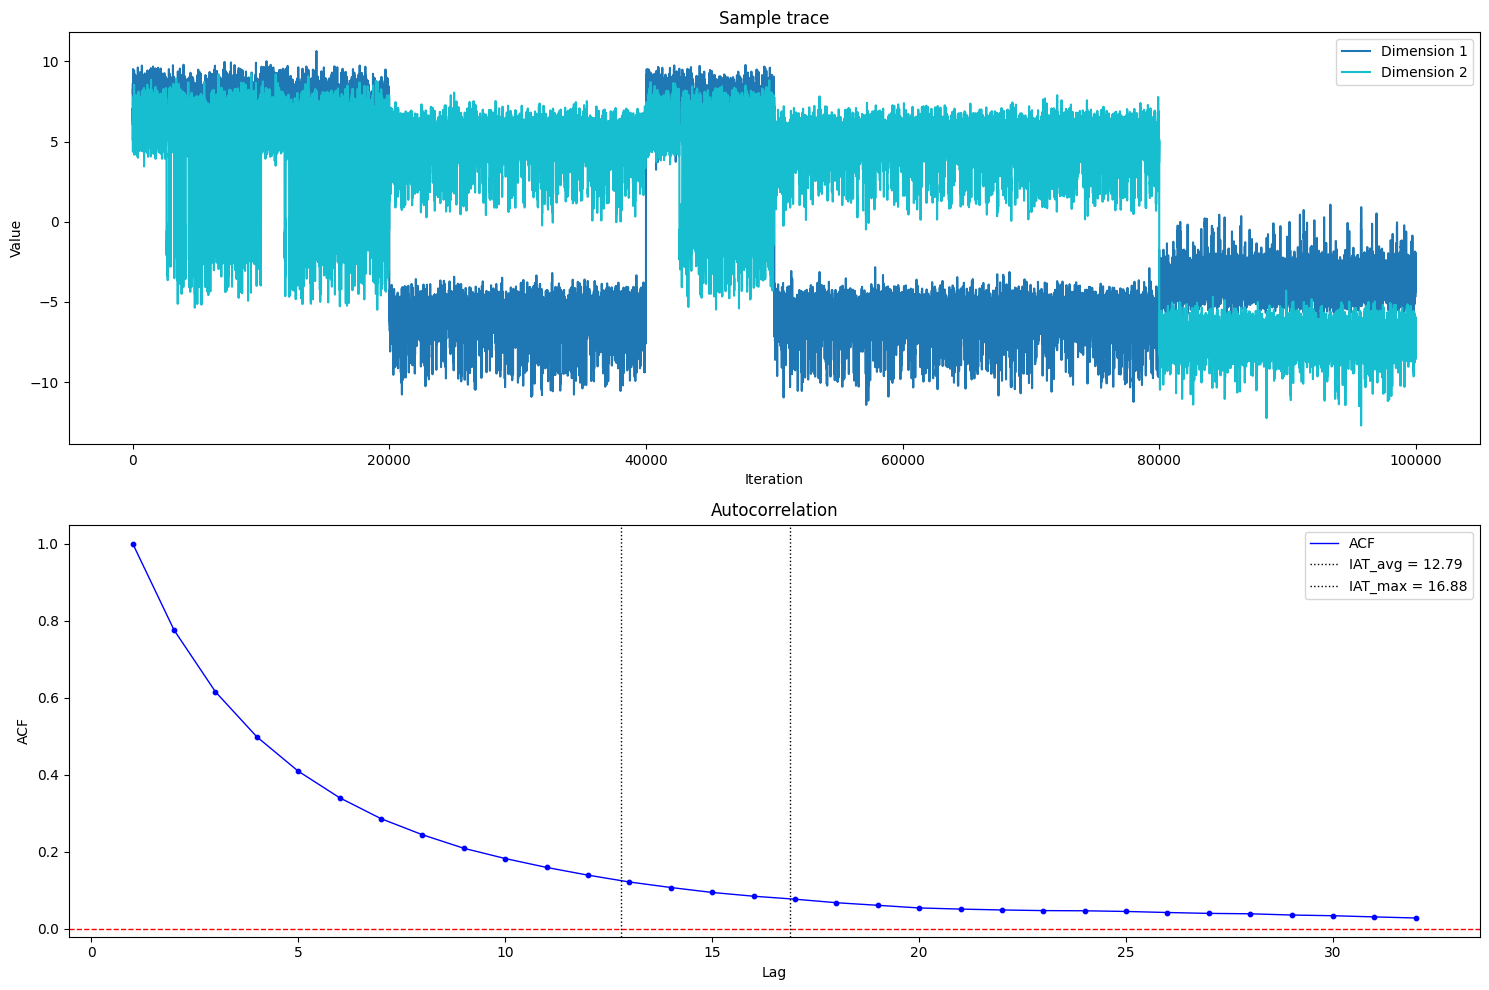

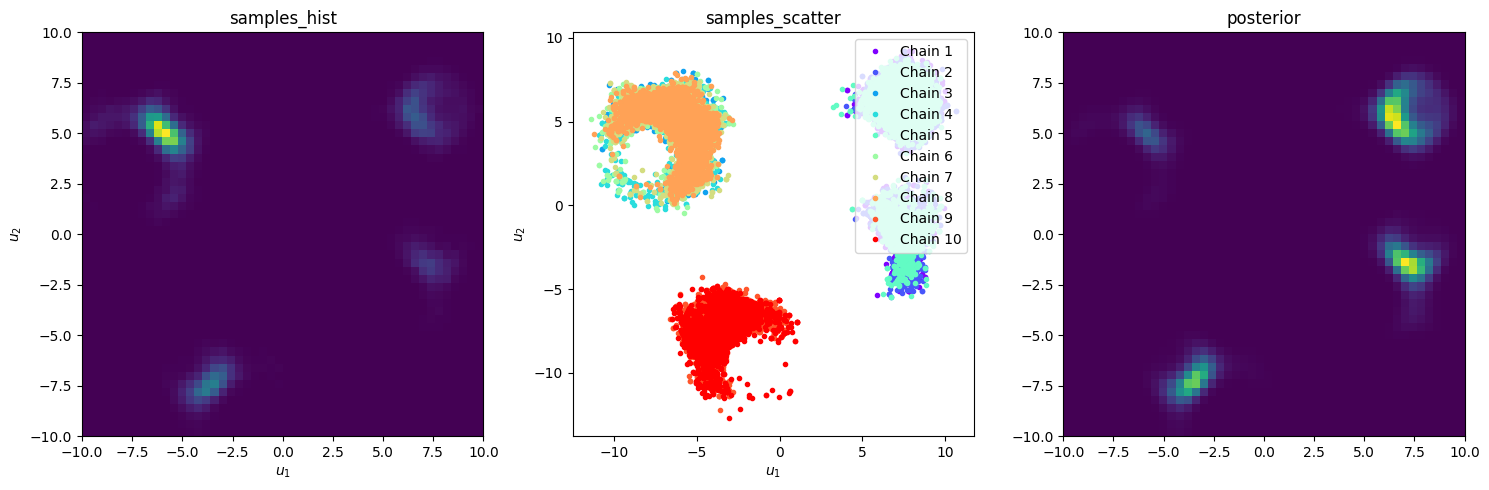

Sampling Method: DRAM
Scale Factor: 2.88
t0: 100
Initial covariance (C0): [[2.88 0.  ]
 [0.   2.88]]
Covariance Matrix: [[0. 0.]
 [0. 0.]]
Epsilon: 1e-05
Burn-in: 0.2
Update Step: 1
Number of Stages: 3
Gammas: [1.0, 0.5, 0.25]
Mean of Samples: [-3.60815575 -7.37345545]
Acceptance rate for stage 1: 28.04%
Acceptance rate for stage 2: 33.20%
Acceptance rate for stage 3: 29.12%
-----------------------------------------------------------------------------------------
Acceptance rate: 65.93%


Chains  IAT_avg  IAT_max     ESS  Cost_per_sample  Cost_per_ESS    Acc  \
0    Chain 1   73.165  138.544   136.0              2.2       161.787  0.530   
1    Chain 2   47.941   87.083   208.0              2.2       105.784  0.500   
2    Chain 3    9.572   12.160  1044.0              2.2        21.076  0.550   
3    Chain 4   10.810   12.951   925.0              2.2        23.787  0.560   
4    Chain 5   96.077  185.571   104.0              2.2       211.567  0.520   
5    Chain 6    9.501    9.778  1052.0              2.2        20.915  0.590   
6    Chain 7    9.564   10.522  1045.0              2.2        21.056  0.570   
7    Chain 8   10.403   10.478   961.0              2.2        22.896  0.540   
8    Chain 9    5.665    6.366  1765.0              2.2        12.466  0.690   
9   Chain 10    7.328    7.463  1364.0              2.2        16.131  0.660   
10   Overall   12.795   16.876  7815.0              2.2        28.155  0.571   

    R_hat_avg  R_hat_max      KL  
0         NaN        NaN   4.519  
1         NaN        NaN   4.511  
2         NaN        NaN  14.775  
3         NaN        NaN  14.774  
4         NaN        NaN   4.512  
5         NaN        NaN  14.774  
6         NaN        NaN  14.773  
7         NaN        NaN  14.773  
8         NaN        NaN  12.557  
9         NaN        NaN  12.557  
10      4.553      6.658   0.793

In [7]:
chains = 10
num_samples = 10000
initial = None
visualize = True
ranges = [(-10, 10), (-10, 10)]

Acc = True
distance = False
autocorrelation = True
ESS = True
R_hat = True
KL = True
old = False

multimodal_DRAM_benchmark, multimodal_DRAM_all_samples = benchmark(sampler=multimodal_DRAM,
                                                                    chains=chains,
                                                                    num_samples=num_samples,
                                                                    initial=initial,
                                                                    ranges=ranges,
                                                                    visualize=visualize,
                                                                    Acc=Acc,
                                                                    distance=distance,
                                                                    autocorrelation=autocorrelation,
                                                                    ESS=ESS,
                                                                    R_hat=R_hat,
                                                                    KL=KL,
                                                                    old=old)

multimodal_DRAM.samples = multimodal_DRAM_all_samples
multimodal_DRAM.visualize(["samples_hist", "samples_scatter", "posterior"], ranges=ranges)
multimodal_DRAM.print_info()

multimodal_DRAM_benchmark
#multimodal_DRAM_benchmark.to_excel("multimodal_DRAM_benchmark.xlsx", index=False)

#### Benchmark Average

In [ ]:
chains = 10
num_samples = 10000
initial = None
visualize = True
ranges = [(-10, 10), (-10, 10)]

Acc = True
distance = False
autocorrelation = True
ESS = True
R_hat = True
KL = True
old = False
runs = 10

multimodal_DRAM_benchmark_average, multimodal_DRAM_average_all_samples = benchmark_average(sampler=multimodal_DRAM,
                                                                                            runs=runs,
                                                                                            chains=chains,
                                                                                            num_samples=num_samples,
                                                                                            initial=initial,
                                                                                            ranges=ranges,
                                                                                            visualize=visualize,
                                                                                            Acc=Acc,
                                                                                            distance=distance,
                                                                                            autocorrelation=autocorrelation,
                                                                                            ESS=ESS,
                                                                                            R_hat=R_hat,
                                                                                            KL=KL,
                                                                                            old=old)

multimodal_DRAM.print_info()
multimodal_DRAM_benchmark_average
#multimodal_DRAM_benchmark_average.to_excel("multimodal_DRAM_benchmark_average.xlsx", index=False)

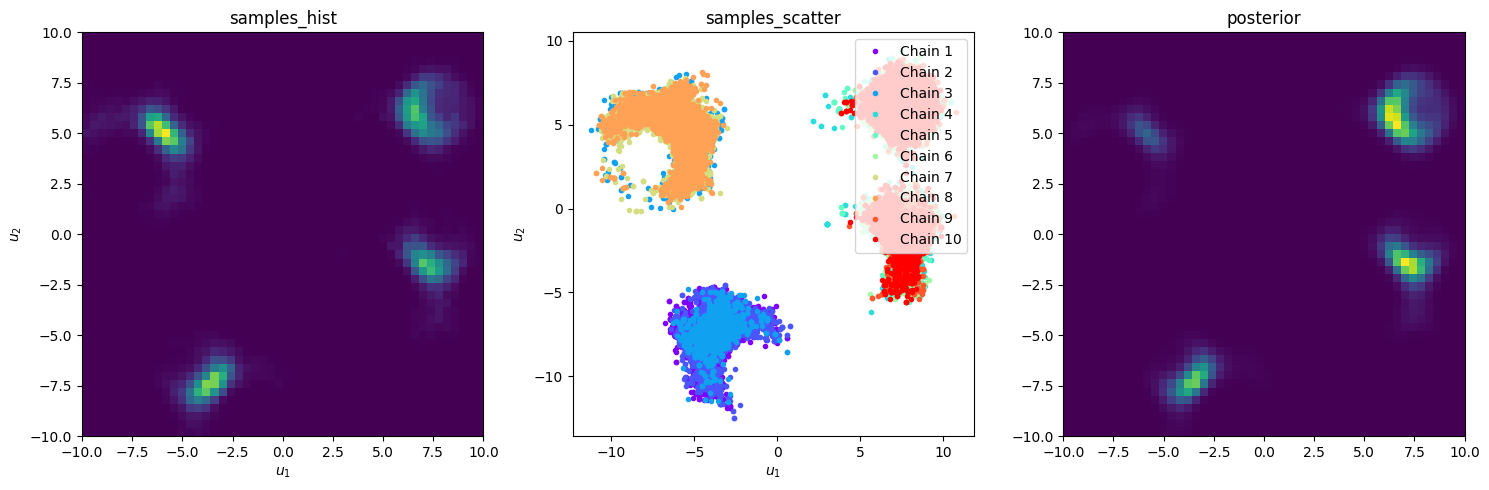

Runs   IAT_avg   IAT_max     ESS  Cost_per_sample  Cost_per_ESS  \
0     Run 1   14.8740   21.0860  6723.0           2.5760       38.3150   
1     Run 2   14.3850   20.1760  6951.0           2.4200       34.8140   
2     Run 3   40.8630   66.1790  2447.0           2.4700      100.9600   
3     Run 4   17.9540   27.1970  5569.0           2.4250       43.5370   
4     Run 5   24.2920   37.1320  4116.0           2.5050       60.8530   
5     Run 6   38.2680   63.3520  2613.0           2.4770       94.8030   
6     Run 7   40.1420   66.5970  2491.0           2.4370       97.8440   
7     Run 8  306.9030  565.8950   325.0           2.1630      665.6310   
8     Run 9   13.3830   18.1980  7472.0           2.3600       31.5810   
9    Run 10   12.8750   16.7530  7766.0           2.2060       28.4030   
10  Average   52.3939   90.2565  4647.3           2.4039      119.6741   

       Acc  R_hat_avg  R_hat_max      KL  
0   0.5550      4.644     7.0050  0.4400  
1   0.5470      4.733     7.3000  0.4460  
2   0.5040      4.212     6.7000  0.4700  
3   0.5220      4.607     7.3280  0.3790  
4   0.4970      3.986     6.1140  0.5530  
5   0.5390      4.279     6.5800  0.5530  
6   0.4910      4.050     6.5650  0.4170  
7   0.5740      3.350     4.9830  0.3860  
8   0.5220      4.524     7.3670  0.4820  
9   0.5910      4.495     5.6860  0.9980  
10  0.5342      4.288     6.5628  0.5124

In [ ]:
samples = multimodal_DRAM_average_all_samples[2]
multimodal_DRAM.visualize(["samples_hist", "samples_scatter", "posterior"], ranges=ranges, samples=samples)
multimodal_DRAM.visualize(["samples_trace", "samples_acf"], ranges=ranges, samples=samples)
multimodal_DRAM.sampling_quality(samples, visualise=True, ranges=ranges)
multimodal_DRAM_benchmark_average

## **DREAM**

### **Multimodal distribution (dim=2)**

In [8]:
chains = None
scale_factor = None
burnin = 0.2
nCR = 3
max_pairs = 3
eps = 1e-5
outlier_detection = True

multimodal_DREAM = DREAM(distribution=multimodal, 
                    chains=chains, 
                    scale_factor=scale_factor, 
                    burnin=burnin, 
                    nCR=nCR, 
                    max_pairs=max_pairs, 
                    eps=eps,
                    outlier_detection=outlier_detection)

#### Benchmark

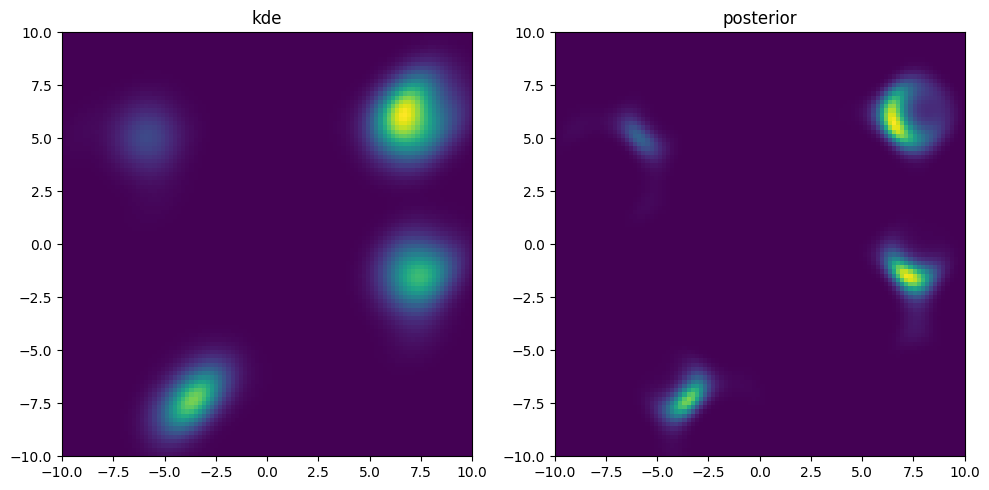

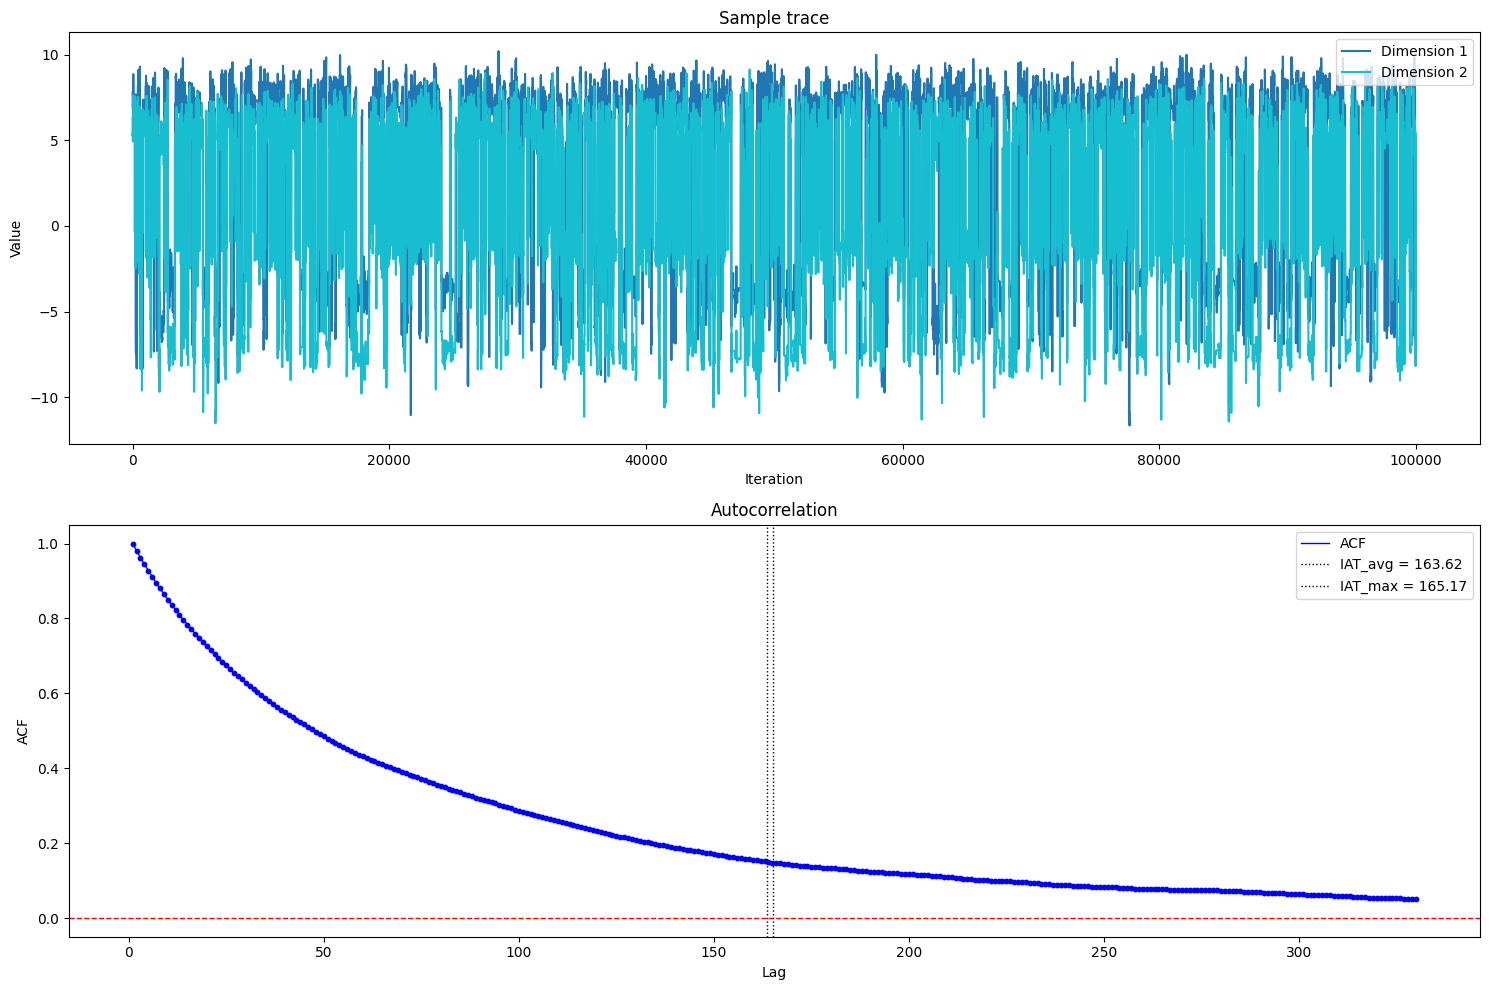

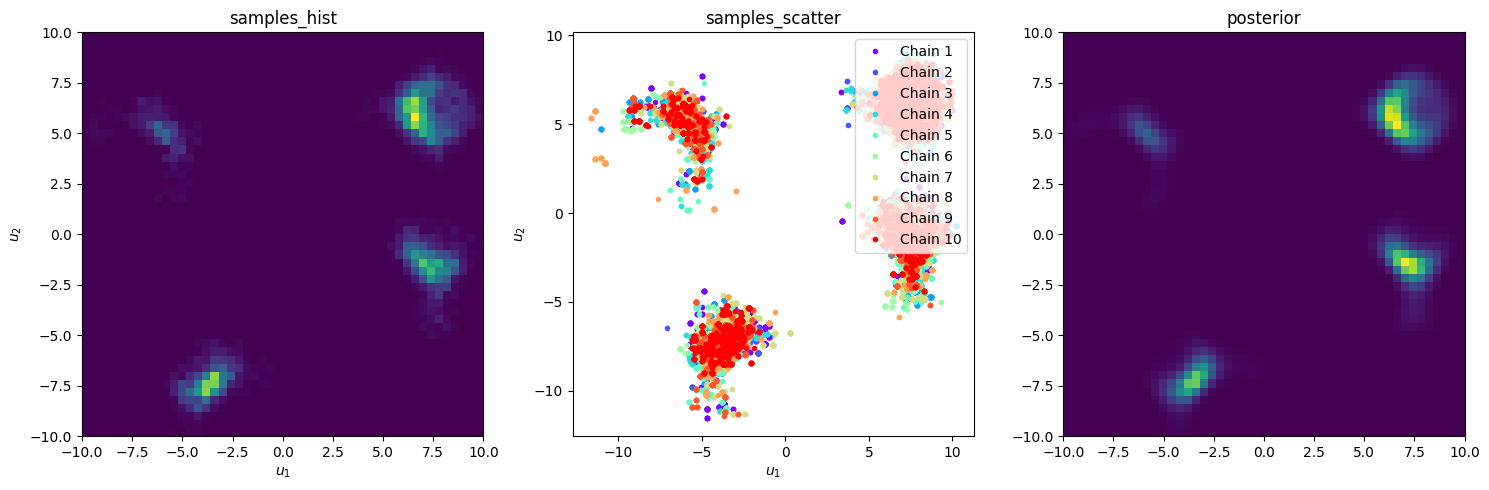

Sampling Method: DREAM
Number of Chains: 10
Scale Factor: 2.38
Burn-in: 0.2
Max Pairs: 3
Epsilon: 1e-05
Outlier Detection: True
Outlier Resets: 0
R_hat: [1.01172251 1.01011347]
nCR: 3
p_a: [0.20182649 0.39249893 0.40567458]
h_a: [26898. 46070. 47032.]
Delta_a: [1526.38055399 4477.89914765 5558.74602674]
Mean of Samples: [3.57388957 0.90235689]
Acceptance rate for chain 1: 22.84%
Acceptance rate for chain 2: 22.44%
Acceptance rate for chain 3: 22.70%
Acceptance rate for chain 4: 22.63%
Acceptance rate for chain 5: 22.72%
Acceptance rate for chain 6: 22.41%
Acceptance rate for chain 7: 22.77%
Acceptance rate for chain 8: 22.32%
Acceptance rate for chain 9: 22.48%
Acceptance rate for chain 10: 22.27%
-----------------------------------------------------------------------------------------
Acceptance rate: 22.56%


Chains  IAT_avg  IAT_max    ESS  Cost_per_sample  Cost_per_ESS    Acc  \
0    Chain 1  105.530  105.882   94.0              1.0       106.383  0.230   
1    Chain 2  206.774  218.568   48.0              1.0       208.333  0.220   
2    Chain 3  257.859  274.108   38.0              1.0       263.158  0.230   
3    Chain 4  221.629  354.058   45.0              1.0       222.222  0.230   
4    Chain 5  236.449  303.685   42.0              1.0       238.095  0.230   
5    Chain 6  270.959  338.725   36.0              1.0       277.778  0.220   
6    Chain 7  123.701  136.453   80.0              1.0       125.000  0.230   
7    Chain 8  128.038  128.879   78.0              1.0       128.205  0.220   
8    Chain 9  143.712  145.833   69.0              1.0       144.928  0.220   
9   Chain 10  109.811  121.939   91.0              1.0       109.890  0.220   
10   Overall  163.622  165.172  611.0              1.0       163.666  0.225   

    R_hat_avg  R_hat_max     KL  
0         NaN        NaN  0.602  
1         NaN        NaN  0.578  
2         NaN        NaN  0.527  
3         NaN        NaN  0.570  
4         NaN        NaN  0.610  
5         NaN        NaN  0.575  
6         NaN        NaN  0.618  
7         NaN        NaN  0.534  
8         NaN        NaN  0.591  
9         NaN        NaN  0.567  
10      1.011      1.012  0.310

In [9]:
chains = 10
num_samples = 10000
initial = None
visualize = True
ranges = [(-10, 10), (-10, 10)]

Acc = True
distance = False
autocorrelation = True
ESS = True
R_hat = True
KL = True
old = False

multimodal_DREAM_benchmark, multimodal_DREAM_all_samples = benchmark(sampler=multimodal_DREAM,
                                                                        chains=chains,
                                                                        num_samples=num_samples,
                                                                        initial=initial,
                                                                        ranges=ranges,
                                                                        visualize=visualize,
                                                                        Acc=Acc,
                                                                        distance=distance,
                                                                        autocorrelation=autocorrelation,
                                                                        ESS=ESS,
                                                                        R_hat=R_hat,
                                                                        KL=KL,
                                                                        old=old)

multimodal_DREAM.samples = multimodal_DREAM_all_samples
multimodal_DREAM.visualize(["samples_hist", "samples_scatter", "posterior"], ranges=ranges)
multimodal_DREAM.print_info()

multimodal_DREAM_benchmark
#multimodal_DREAM_benchmark.to_excel("multimodal_DREAM_benchmark.xlsx", index=False)

#### Benchmark Average

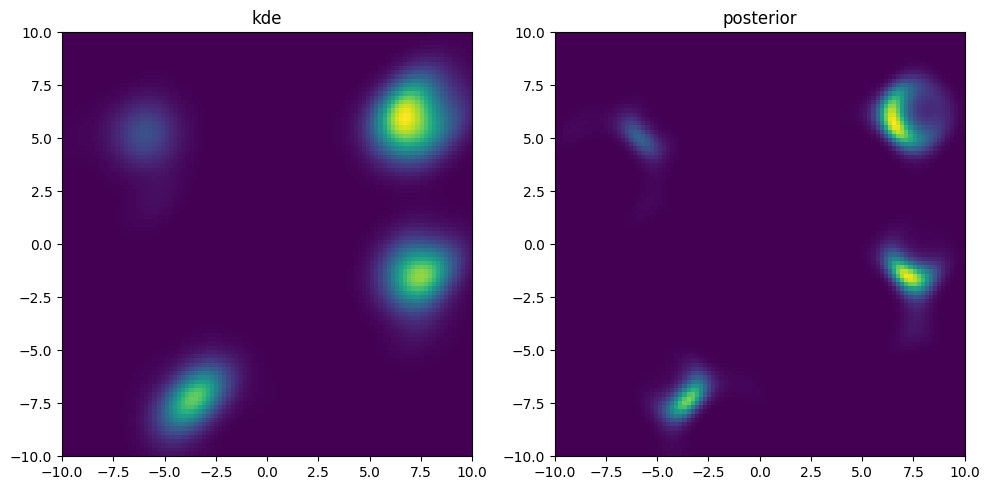

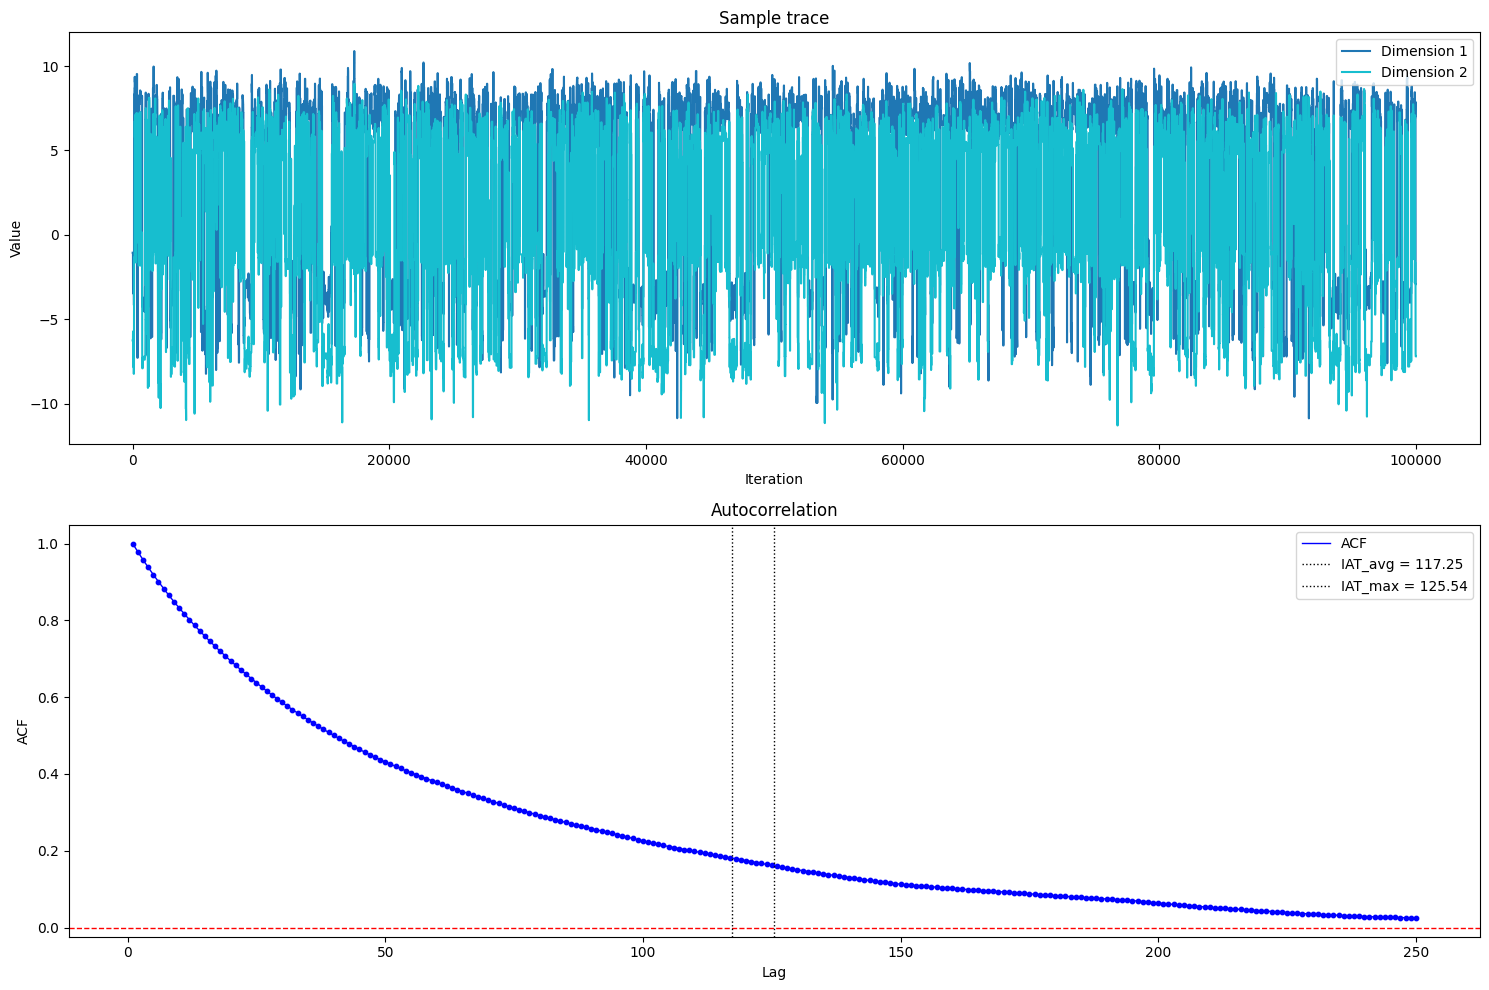

Sampling Method: DREAM
Number of Chains: 10
Scale Factor: 2.38
Burn-in: 0.1
Max Pairs: 3
Epsilon: 1e-05
Outlier Detection: True
Outlier Resets: 0
R_hat: [1.01545103 1.01628933]
nCR: 3
p_a: [0.21819666 0.36944332 0.41236002]
h_a: [25319. 40201. 44480.]
Delta_a: [1378.65835415 3507.92152235 5383.99048978]
Mean of Samples: [3.72856158 0.91587596]
Acceptance rate for chain 1: 22.60%
Acceptance rate for chain 2: 22.23%
Acceptance rate for chain 3: 23.12%
Acceptance rate for chain 4: 23.00%
Acceptance rate for chain 5: 22.82%
Acceptance rate for chain 6: 22.79%
Acceptance rate for chain 7: 22.48%
Acceptance rate for chain 8: 22.42%
Acceptance rate for chain 9: 23.14%
Acceptance rate for chain 10: 23.26%
-----------------------------------------------------------------------------------------
Acceptance rate: 22.79%


Runs   IAT_avg   IAT_max    ESS  Cost_per_sample  Cost_per_ESS     Acc  \
0     Run 1  115.1140  119.7140  868.0              1.0      115.2070  0.2070   
1     Run 2  135.0510  135.3120  740.0              1.0      135.1350  0.2320   
2     Run 3  132.5940  146.8960  754.0              1.0      132.6260  0.2250   
3     Run 4  126.2570  131.3410  792.0              1.0      126.2630  0.2110   
4     Run 5  113.7610  118.3300  879.0              1.0      113.7660  0.1990   
5     Run 6  139.6080  144.4580  716.0              1.0      139.6650  0.2290   
6     Run 7  162.2820  168.4740  616.0              1.0      162.3380  0.2520   
7     Run 8  182.8130  222.9070  547.0              1.0      182.8150  0.2490   
8     Run 9  139.1430  148.5980  718.0              1.0      139.2760  0.2300   
9    Run 10  117.2520  125.5360  852.0              1.0      117.3710  0.2270   
10  Average  136.3875  146.1566  748.2              1.0      136.4462  0.2261   

    R_hat_avg  R_hat_max      KL  
0      1.0300     1.0330  0.2950  
1      1.0130     1.0140  0.3040  
2      1.0120     1.0170  0.2990  
3      1.0080     1.0080  0.3100  
4      1.0110     1.0140  0.3150  
5      1.0150     1.0200  0.3130  
6      1.0070     1.0090  0.2960  
7      1.0090     1.0090  0.2750  
8      1.0050     1.0060  0.3010  
9      1.0160     1.0160  0.3030  
10     1.0126     1.0146  0.3011

In [ ]:
chains = 10
num_samples = 10000
initial = None
visualize = True
ranges = [(-10, 10), (-10, 10)]

Acc = True
distance = False
autocorrelation = True
ESS = True
R_hat = True
KL = True
old = False
runs = 10

multimodal_DREAM_benchmark_average, multimodal_DREAM_average_all_samples = benchmark_average(sampler=multimodal_DREAM,
                                                                                            runs=runs,
                                                                                            chains=chains,
                                                                                            num_samples=num_samples,
                                                                                            initial=initial,
                                                                                            ranges=ranges,
                                                                                            visualize=visualize,
                                                                                            Acc=Acc,
                                                                                            distance=distance,
                                                                                            autocorrelation=autocorrelation,
                                                                                            ESS=ESS,
                                                                                            R_hat=R_hat,
                                                                                            KL=KL,
                                                                                            old=old)

multimodal_DREAM.print_info()
#multimodal_DREAM_benchmark_average.to_excel("multimodal_DREAM_benchmark_average.xlsx", index=False)

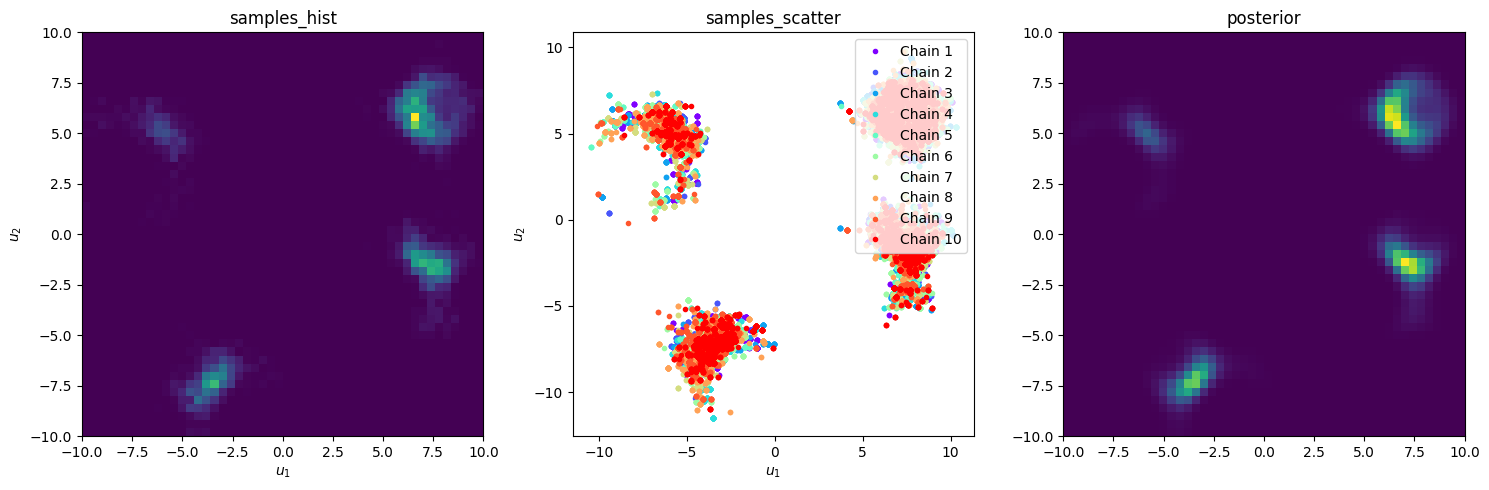

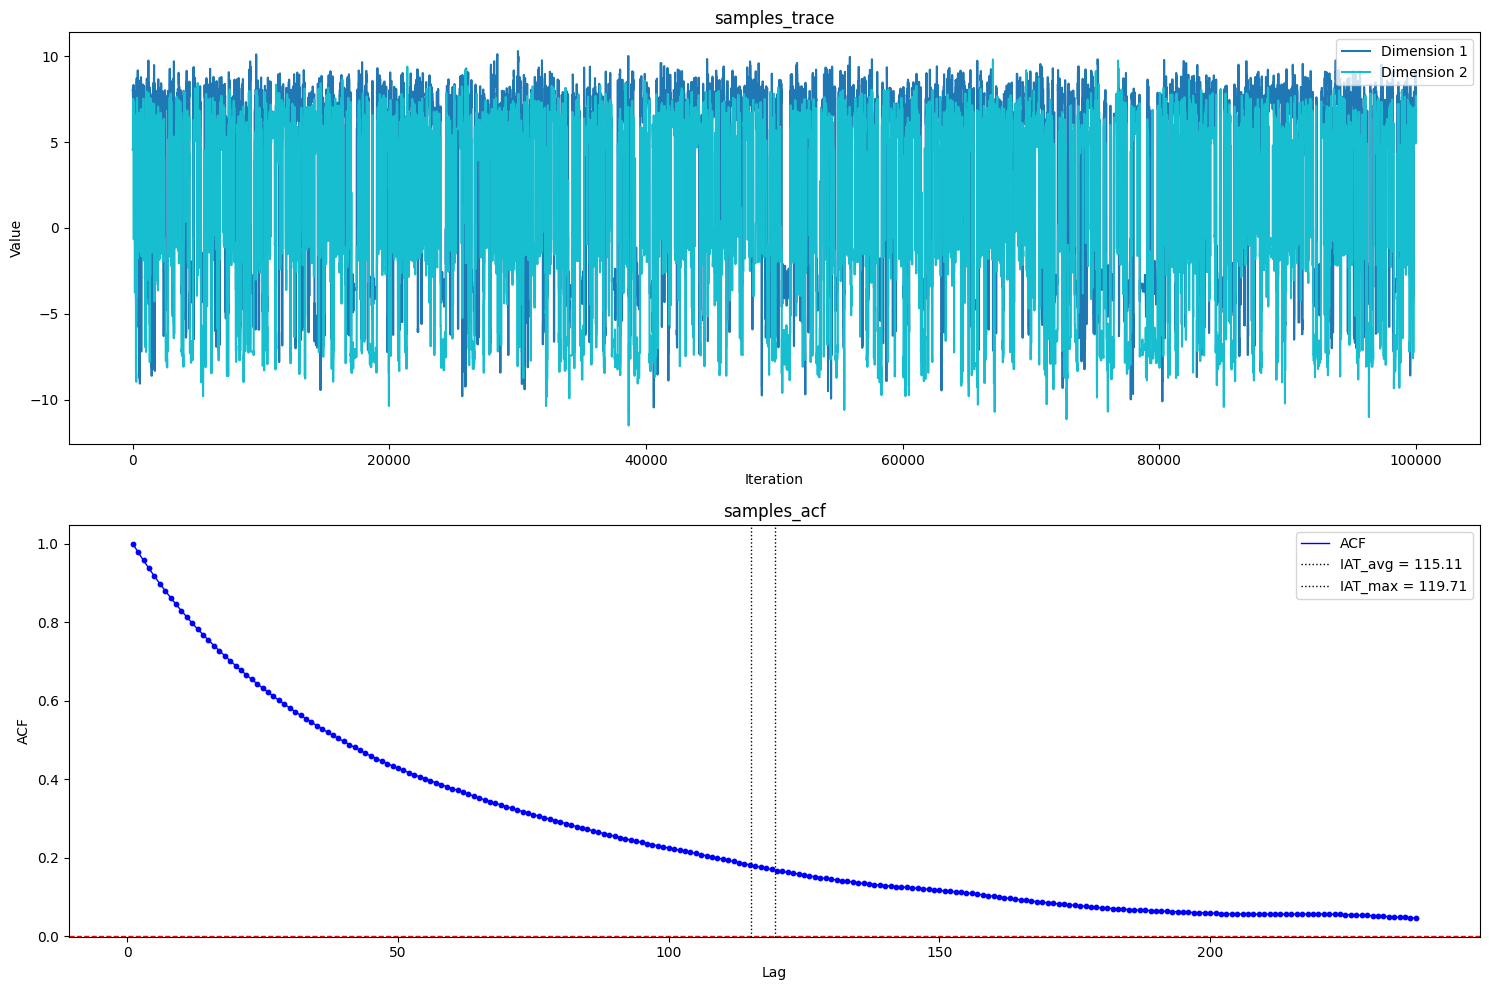

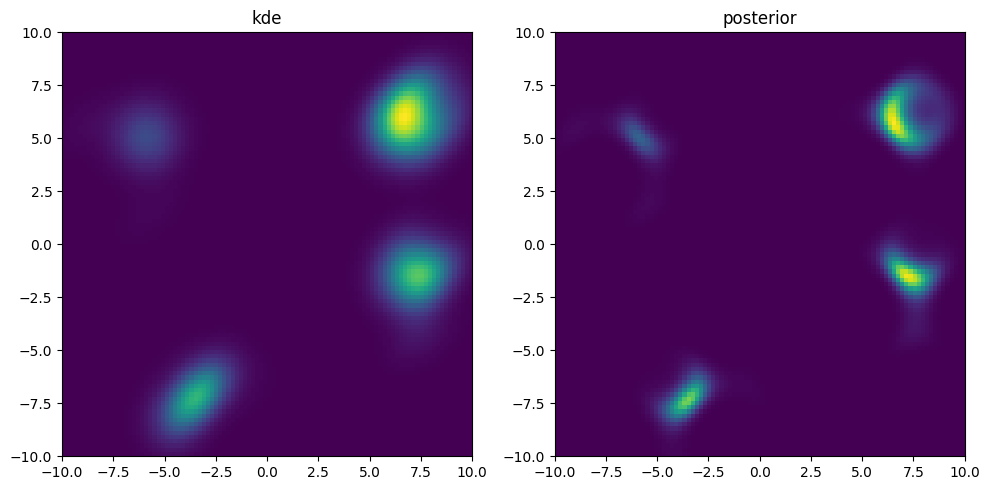

Runs   IAT_avg   IAT_max    ESS  Cost_per_sample  Cost_per_ESS     Acc  \
0     Run 1  115.1140  119.7140  868.0              1.0      115.2070  0.2070   
1     Run 2  135.0510  135.3120  740.0              1.0      135.1350  0.2320   
2     Run 3  132.5940  146.8960  754.0              1.0      132.6260  0.2250   
3     Run 4  126.2570  131.3410  792.0              1.0      126.2630  0.2110   
4     Run 5  113.7610  118.3300  879.0              1.0      113.7660  0.1990   
5     Run 6  139.6080  144.4580  716.0              1.0      139.6650  0.2290   
6     Run 7  162.2820  168.4740  616.0              1.0      162.3380  0.2520   
7     Run 8  182.8130  222.9070  547.0              1.0      182.8150  0.2490   
8     Run 9  139.1430  148.5980  718.0              1.0      139.2760  0.2300   
9    Run 10  117.2520  125.5360  852.0              1.0      117.3710  0.2270   
10  Average  136.3875  146.1566  748.2              1.0      136.4462  0.2261   

    R_hat_avg  R_hat_max      KL  
0      1.0300     1.0330  0.2950  
1      1.0130     1.0140  0.3040  
2      1.0120     1.0170  0.2990  
3      1.0080     1.0080  0.3100  
4      1.0110     1.0140  0.3150  
5      1.0150     1.0200  0.3130  
6      1.0070     1.0090  0.2960  
7      1.0090     1.0090  0.2750  
8      1.0050     1.0060  0.3010  
9      1.0160     1.0160  0.3030  
10     1.0126     1.0146  0.3011

In [7]:
samples = multimodal_DREAM_average_all_samples[0]
multimodal_DREAM.visualize(["samples_hist", "samples_scatter", "posterior"], ranges=ranges, samples=samples)
multimodal_DREAM.visualize(["samples_trace", "samples_acf"], ranges=ranges, samples=samples, vertical=True)
multimodal_DREAM.sampling_quality(samples, visualise=True, ranges=ranges)
multimodal_DREAM_benchmark_average

### **Donut distribution (dim=2)**

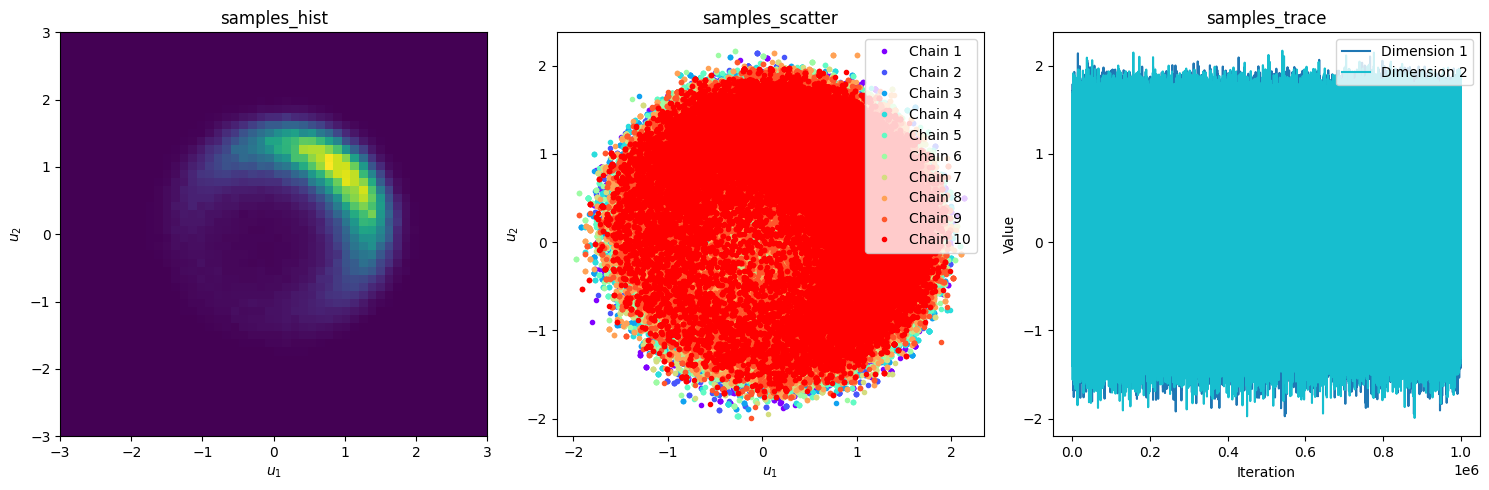

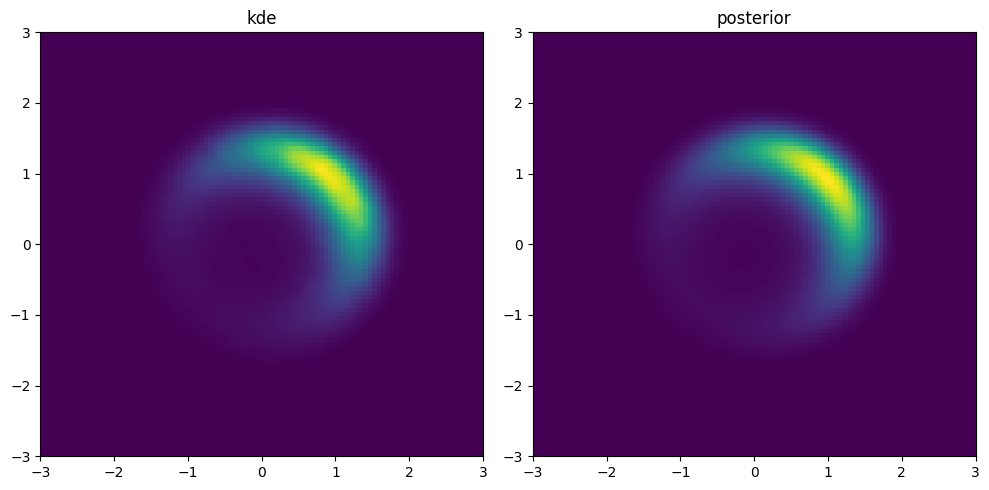

KL: 0.0023394521793110297


IndexError: too many indices for array: array is 1-dimensional, but 3 were indexed

In [8]:
chains = None
scale_factor = None
burnin = 0.2
nCR = 3
max_pairs = 3
eps = 1e-5
outlier_detection = True

donut_DREAM = DREAM(distribution=donut, 
                    chains=chains, 
                    scale_factor=scale_factor, 
                    burnin=burnin, 
                    nCR=nCR, 
                    max_pairs=max_pairs, 
                    eps=eps,
                    outlier_detection=outlier_detection)

initial = None
N = 100000

donut_DREAM.sample(initial=initial, N=N)
ranges = [(-3, 3), (-3, 3)]
donut_DREAM.visualize(["samples_hist", "samples_scatter", "samples_trace"], ranges=ranges)
print("KL:", donut_DREAM.sampling_quality(donut_DREAM.samples, ranges=ranges, visualise=True))
for chain in range(donut_DREAM.chains):
    print(f"Acceptance rate for chain {chain+1}: {((sum(donut_DREAM.acc[chain,:,1])/len(donut_DREAM.samples))*100):.2f}%")
print("-----------------------------------------------------------------------------------------")
print(f"Acceptance rate: {((np.sum(donut_DREAM.acc[:,:,1])/(len(donut_DREAM.samples)*donut_DREAM.chains))*100):.2f}%")

In [ ]:
smpls = donut_DREAM.samples.transpose(1, 0, 2).reshape(-1, 2)
print("Samples shape:", smpls.shape)
print("Mean of samples:", np.mean(smpls, axis=0))
normalized_euclidean_distance(smpls, np.array([1.0, 1.0]))
#print("True mean:", donut_DREAM.true_mean)

Samples shape: (1000000, 2)
Mean of samples: [0.62576797 0.63184053]


### **Banana distribution (dim=2)**

In [ ]:
chains = None
scale_factor = None
burnin = 0.2
nCR = 3
max_pairs = 3
eps = 1e-5
num_stages = 1
outlier_detection = True

banana_DREAM = DREAM(distribution=banana, 
                     chains=chains, 
                     scale_factor=scale_factor, 
                     burnin=burnin, 
                     nCR=nCR, 
                     max_pairs=max_pairs, 
                     eps=eps, 
                     num_stages=num_stages, 
                     outlier_detection=outlier_detection)

initial = None
N = 100000

banana_DREAM.sample(initial=initial, N=N)
ranges = [(-2, 3), (-2, 4)]
banana_DREAM.visualize(["samples_hist", "samples_scatter", "samples_trace"], ranges=ranges)
print("KL:", banana_DREAM.sampling_quality(banana_DREAM.samples, ranges=ranges, visualise=True))
for chain in range(banana_DREAM.chains):
    print(f"Acceptance rate for chain {chain+1}: {((sum(banana_DREAM.acc[chain,:,1])/len(banana_DREAM.samples))*100):.2f}%")
print("-----------------------------------------------------------------------------------------")
print(f"Acceptance rate: {((np.sum(banana_DREAM.acc[:,:,1])/(len(banana_DREAM.samples)*banana_DREAM.chains))*100):.2f}%")

### **Multidim distribution (dim=39)**

In [4]:
chains = 20
scale_factor = None
burnin = 0.2
nCR = 3
max_pairs = 3
eps = 1e-5
num_stages = 1
outlier_detection = True

test_DREAM = DREAM(distribution=test, 
                   chains=chains, 
                   scale_factor=scale_factor, 
                   burnin=burnin, 
                   nCR=nCR, 
                   max_pairs=max_pairs, 
                   eps=eps, 
                   num_stages=num_stages, 
                   outlier_detection=outlier_detection)

initial = None
N = 10000

test_DREAM.sample(initial=initial, N=N)

array([[[ 4.08185483,  1.31940056, -4.86977869, ..., -2.4956243 ,
          4.37354692,  1.64355489],
        [ 4.99570148,  0.64694204, -2.52893052, ...,  2.1062285 ,
          6.13958713, -0.58305309],
        [ 4.78118801,  1.89040109,  3.34574876, ...,  4.83857795,
          5.30538966,  0.13210338],
        ...,
        [ 8.09909725,  2.95409018, -8.05998945, ...,  3.70149006,
          6.30960484, -0.98283942],
        [ 2.26445665,  2.2724761 , -6.4542785 , ...,  3.40412235,
          7.05520416,  1.81605699],
        [ 6.98296137, -0.11954209, -4.94006712, ...,  5.74241675,
          2.37108427,  0.30822877]],

       [[ 4.08185483,  1.31940056, -4.86977869, ..., -2.4956243 ,
          4.37354692,  1.64355489],
        [ 4.99570148,  0.64694204, -2.52893052, ...,  1.13244312,
          6.75503496, -0.91609248],
        [ 4.78118801,  1.89040109,  3.34574876, ...,  4.83857795,
          5.30538966,  0.13210338],
        ...,
        [ 7.50490346,  2.79191911, -5.88036946, ...,  

In [5]:
print("Gelman-Rubin diagnostic R_hat per dimension:")
print(test_DREAM.R_hat)  # or simply print(donut_DREAM.R_hat) if computed within sample()

print("Acceptance rates per chain:")
print(test_DREAM.acc_rate)

Gelman-Rubin diagnostic R_hat per dimension:
[1.0171417  1.01000717 1.0098989  1.01036616 1.02783564 1.00566879
 1.01246773 1.01607423 1.01130847 1.01348254 1.01392582 1.01342816
 1.01372389 1.01486568 1.0094147  1.0288478  1.01805074 1.01775675
 1.00616496 1.02065899 1.01726504 1.0206967  1.01044446 1.01308482
 1.01014192 1.01215866 1.0252307  1.0132472  1.01666714 1.01238641
 1.01661067 1.01091174 1.01490932 1.00767669 1.01856129 1.01751734
 1.01039893 1.0192451  1.01754892]
Acceptance rates per chain:
[[0.2453]
 [0.2415]
 [0.246 ]
 [0.2399]
 [0.2504]
 [0.254 ]
 [0.2509]
 [0.2544]
 [0.2512]
 [0.2407]
 [0.246 ]
 [0.2472]
 [0.2436]
 [0.2442]
 [0.2511]
 [0.2501]
 [0.2427]
 [0.2475]
 [0.2419]
 [0.2404]]


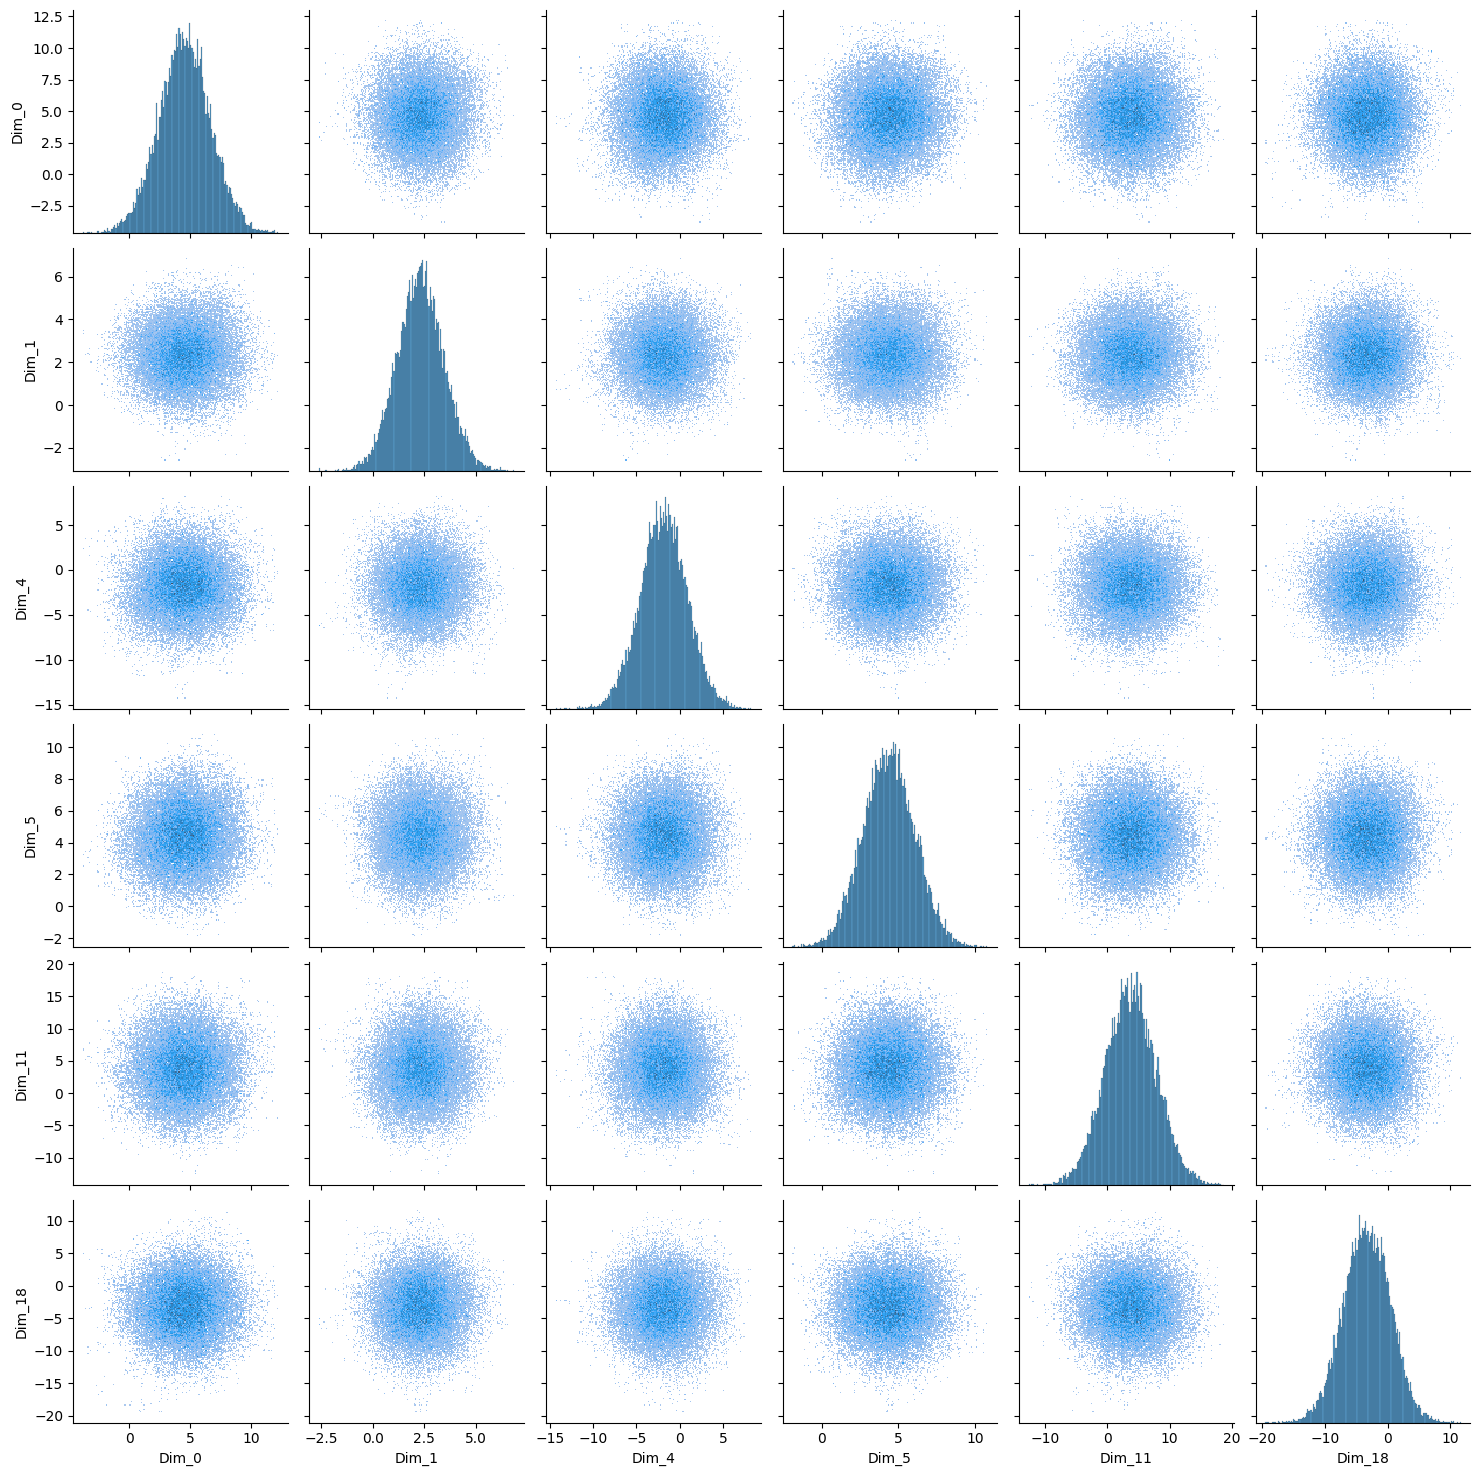

In [6]:
import seaborn as sns
import pandas as pd
import numpy as np

# Select a few random pairs of dimensions
num_pairs = 3
dimensions = test_DREAM.samples.shape[1]
random_pairs = np.random.choice(dimensions, size=(num_pairs, 2), replace=False)

# Reshape the samples array to 2D (combine the first two dimensions)
reshaped_samples = test_DREAM.samples.reshape(-1, test_DREAM.samples.shape[-1])

# Create a DataFrame for the selected dimensions
data = pd.DataFrame(reshaped_samples, columns=[f"Dim_{i}" for i in range(reshaped_samples.shape[1])])
selected_data = data.iloc[:, np.unique(random_pairs.flatten())]

# Plot pairplot
sns.pairplot(selected_data, kind='hist')

# NOTES

- remake visualize function --- (done)
    - split into subfunctions --- (done)
    - fix smaller issues --- (done)
    - easy to call --- (done)
    - adapt for Sampling algorithm classes --- (done)
- remake sampling algorithms into classes --- (done)
    - remake MH --- (done)
    - remake AM --- (done)
        - fix recursive formula in AM --- (done)
    - reamke DRAM --- (done)
        - add i-th stage proposal for DRAM --- (done)
        - fix acceptance_probability --- (done)
    - remake DREAM --- (done)
        - fix outlier detection --- (done)
        - add improve CR distribution --- (done)
        - add i-th stage proposal --- (done)
        - add initial population from prior --- (done)
        - Gelman-Rubin metric --- (done)
    - rework acc_rate --- (done)
- fix animate function --- (done)
- update function descriptions --- (done)
- remake posterior into log posterior --- (done)
    - allow both posterior and log_posterior --- (done)
    - auto create of likelihood and prior and combined posterior --- (done)
        - gaussian mulitimodal multinormal prior --- (done)
    - rework acceptance prob in all sampling algorithms --- (done)
- write theory for sampling algorithms --- (done)
    - MH --- (done)
    - AM --- (done)
    - DRAM --- (done)
    - DREAM --- (done)
-----------------------------------------------------------------------------------------------
- fixes
    - prior, likelihood, posterior --- (working)
    - DR in DREAM --- (working)
    - visualize function for dim > 2
- create high dimension distribution (multi-normal prolly)
- sampling evaluation
    - MH algorithm
        - posterior
        - metrics
        - write "Numerical experimets" section
    - AM algorithm
        - posterior
        - metrics
        - write "Numerical experimets" section
    - DRAM algorithm
        - posterior
        - metrics
        - write "Numerical experimets" section
    - DREAM algorithm
        - posterior
        - metrics
        - write "Numerical experimets" section
    - Heat transfer problem
        - posterior
        - metrics
        - write "Numerical experimets" chapter
- metrics
    - acc_rate (for all chains and DR stages)
    - ESS + autocorrelation
    - model evaluation count
- write Problem setting chapter
- write Introduction + Conclusion

- how to combine chains from DREAM
- model examples
